In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib

import json
from collections import defaultdict


from generate_plots import find_results_json_files, reconcile_results_into_dataframe, get_obfuscation_stats

In [2]:
labeled_bc_dir = pathlib.Path('/home/nika/Desktop/sip_dataset/LABELED-BCs')

df = reconcile_results_into_dataframe(find_results_json_files(labeled_bc_dir))

In [3]:
df['data_source']

0       simple-cov2
1       simple-cov2
2       simple-cov2
3       simple-cov2
4       simple-cov2
           ...     
3325     simple-cov
3326     simple-cov
3327     simple-cov
3328     simple-cov
3329     simple-cov
Name: data_source, Length: 3330, dtype: object

In [4]:
results_table = df.groupby(['data_source', 'obfuscation', 'features'])\
.agg({
    'none': ['mean', 'std'], 
    'sc_guard': ['mean', 'std'], 
    'cfi_verify': ['mean', 'std'], 
    'oh_verify': ['mean', 'std']
}).reset_index()

In [5]:
simple_df = results_table[results_table['data_source'] == 'simple-cov']

simple_df.to_csv('simple_results.csv', index=False)

In [6]:
mibench_df = results_table[results_table['data_source'] == 'mibench-cov']
mibench_df

data_source obfuscation                          features      none  \
                                                                    mean   
0    mibench-cov       BC100                          code2vec  0.994693   
1    mibench-cov       BC100                            ir2vec  0.979595   
2    mibench-cov       BC100                               seg  0.973756   
3    mibench-cov       BC100                      seg + tf_idf  0.983849   
4    mibench-cov       BC100           seg + tf_idf + code2vec  0.996197   
..           ...         ...                               ...       ...   
320  mibench-cov        NONE                      seg + tf_idf  0.942772   
321  mibench-cov        NONE           seg + tf_idf + code2vec  0.972129   
322  mibench-cov        NONE  seg + tf_idf + code2vec + ir2vec  0.987220   
323  mibench-cov        NONE             seg + tf_idf + ir2vec  0.975448   
324  mibench-cov        NONE                            tf_idf  0.882545   

               sc_guard           cfi_verify           oh_verify            
          std      mean       std       mean       std      mean       std  
0    0.002763  0.923313  0.101990   0.954617  0.030698  0.794553  0.080300  
1    0.007548  0.921619  0.144190   0.902581  0.124560  0.436702  0.112316  
2    0.003373  0.644856  0.059205   0.691762  0.116722  0.470786  0.081767  
3    0.005085  0.445289  0.479297   0.778876  0.133177  0.544929  0.076032  
4    0.001805  0.984812  0.015676   0.971525  0.009736  0.811094  0.073272  
..        ...       ...       ...        ...       ...       ...       ...  
320  0.009836  0.701274  0.227398   0.778164  0.097005  0.001214  0.002427  
321  0.026447  0.953786  0.066153   0.826200  0.210129  0.839838  0.099300  
322  0.007825  0.997787  0.003705   0.884876  0.123288  0.905333  0.056208  
323  0.013324  0.996751  0.003730   0.856510  0.141717  0.811078  0.085010  
324  0.024869  0.002439  0.004878   0.052047  0.090481  0.037879  0.070369  

[325 rows x 11 columns]

In [41]:
results_table[results_table['data_source'] == 'simple-cov2']

data_source obfuscation               features      none            \
                                                         mean       std   
453  simple-cov2       BC100                 ir2vec  0.970602  0.007639   
454  simple-cov2       BC100                    seg  0.949734  0.013235   
455  simple-cov2       BC100           seg + tf_idf  0.984181  0.007818   
456  simple-cov2       BC100  seg + tf_idf + ir2vec  0.985771  0.007531   
457  simple-cov2       BC100                 tf_idf  0.979219  0.003512   
..           ...         ...                    ...       ...       ...   
661  simple-cov2        NONE                 ir2vec  0.985236  0.004286   
662  simple-cov2        NONE                    seg  0.939084  0.015189   
663  simple-cov2        NONE           seg + tf_idf  0.971049  0.011406   
664  simple-cov2        NONE  seg + tf_idf + ir2vec  0.977785  0.015642   
665  simple-cov2        NONE                 tf_idf  0.936148  0.036552   

     sc_guard           cfi_verify           oh_verify            
         mean       std       mean       std      mean       std  
453  0.813133  0.242726   0.523724  0.109703  0.545259  0.057969  
454  0.469835  0.053721   0.399077  0.050350  0.444853  0.078567  
455  0.856551  0.129089   0.688632  0.110826  0.649934  0.112961  
456  0.943812  0.080658   0.656391  0.151368  0.714873  0.086118  
457  0.488433  0.053575   0.177454  0.191829  0.294163  0.363669  
..        ...       ...        ...       ...       ...       ...  
661  0.988645  0.012763   0.908721  0.078799  0.869333  0.044021  
662  0.793958  0.141586   0.617896  0.114144  0.734986  0.058343  
663  0.933486  0.075210   0.802729  0.047127  0.721178  0.191050  
664  0.986125  0.013282   0.808342  0.208041  0.885397  0.090900  
665  0.291018  0.373621   0.523215  0.196333  0.276960  0.383065  

[213 rows x 11 columns]

In [40]:
df['features'].unique()

array(['ir2vec', 'seg + tf_idf + ir2vec', 'seg + tf_idf', 'tf_idf', 'seg',
       'code2vec', 'seg + tf_idf + code2vec',
       'seg + tf_idf + code2vec + ir2vec'], dtype=object)

In [8]:
def get_plot_results(df, data_source, protection):

    """
    {
        # obfuscation --> feature results
        'None': {
            'original': [0.98, 0.99, 0.99, ...],
            'no_tf_idf': [],
            'ir2vec': []
        },
        'IS': {
            'original': [...],
            'no_tf_idf': [...],
            'ir2vec': [...]
        },
        'FLA': {
            'original': [...],
            'no_tf_idf': [...],
            'ir2vec': [...]
        }
    }
    """
    plot_results = defaultdict(dict)
    for _, row in df.iterrows():
        if row['data_source'] != data_source:
            continue
        
        obfuscation = row['obfuscation']
        features = row['features']
        
        if features not in plot_results[obfuscation]:
            plot_results[obfuscation][features] = []
        
        plot_results[obfuscation][features].append(row[protection])
        
    return plot_results

In [9]:
def draw_plot(data_labels, data_values, plot_names, title, file_name):    
    label_a, label_b, label_c = plot_names
    data_a, data_b, data_c = data_values
    ticks = data_labels 

    def set_box_color(bp, color):
        plt.setp(bp['boxes'], color=color)
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color=color)
    
    figsize_x = 3 if 'simple' in file_name else 4
    plt.figure(figsize=(len(ticks)//2, figsize_x), dpi=200)

    # bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
    # bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)


    bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a))) - 0.15, sym='', widths=0.08)
    bpm = plt.boxplot(data_b, positions=np.array(range(len(data_b))),       sym='', widths=0.08)
    bpr = plt.boxplot(data_c, positions=np.array(range(len(data_c))) + 0.15, sym='', widths=0.08)

    set_box_color(bpl, '#A9A9A9') # colors are from http://colorbrewer2.org/
    set_box_color(bpm, '#228B22')
    set_box_color(bpr, '#FF0000')

    plt.plot([], c='#A9A9A9', label=label_a)
    plt.plot([], c='#228B22', label=label_b)
    plt.plot([], c='#FF0000', label=label_c)
    plt.legend(loc=4, prop={'size': 6})

    plt.title(title)
    
    plt.xticks(range(0, len(ticks)), ticks, size=6)
    plt.xlim(-0.5, len(ticks))
    plt.ylim(0, 1.1)
    plt.tight_layout()
    
    ax = plt.gca()
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.savefig(file_name)

In [10]:
def median(nums):
    return sorted(nums)[len(nums)//2]

In [46]:
df['features'].unique()

array(['ir2vec', 'seg + tf_idf + ir2vec', 'seg + tf_idf', 'tf_idf', 'seg',
       'code2vec', 'seg + tf_idf + code2vec',
       'seg + tf_idf + code2vec + ir2vec'], dtype=object)

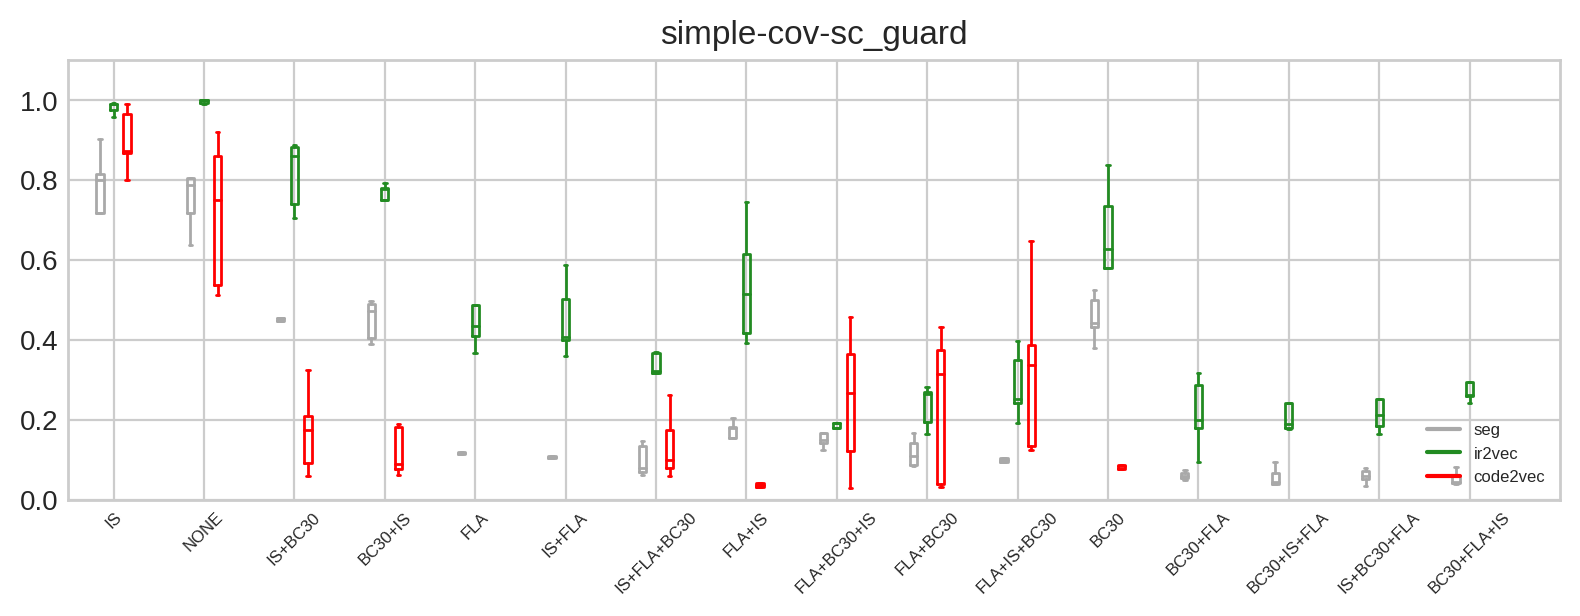

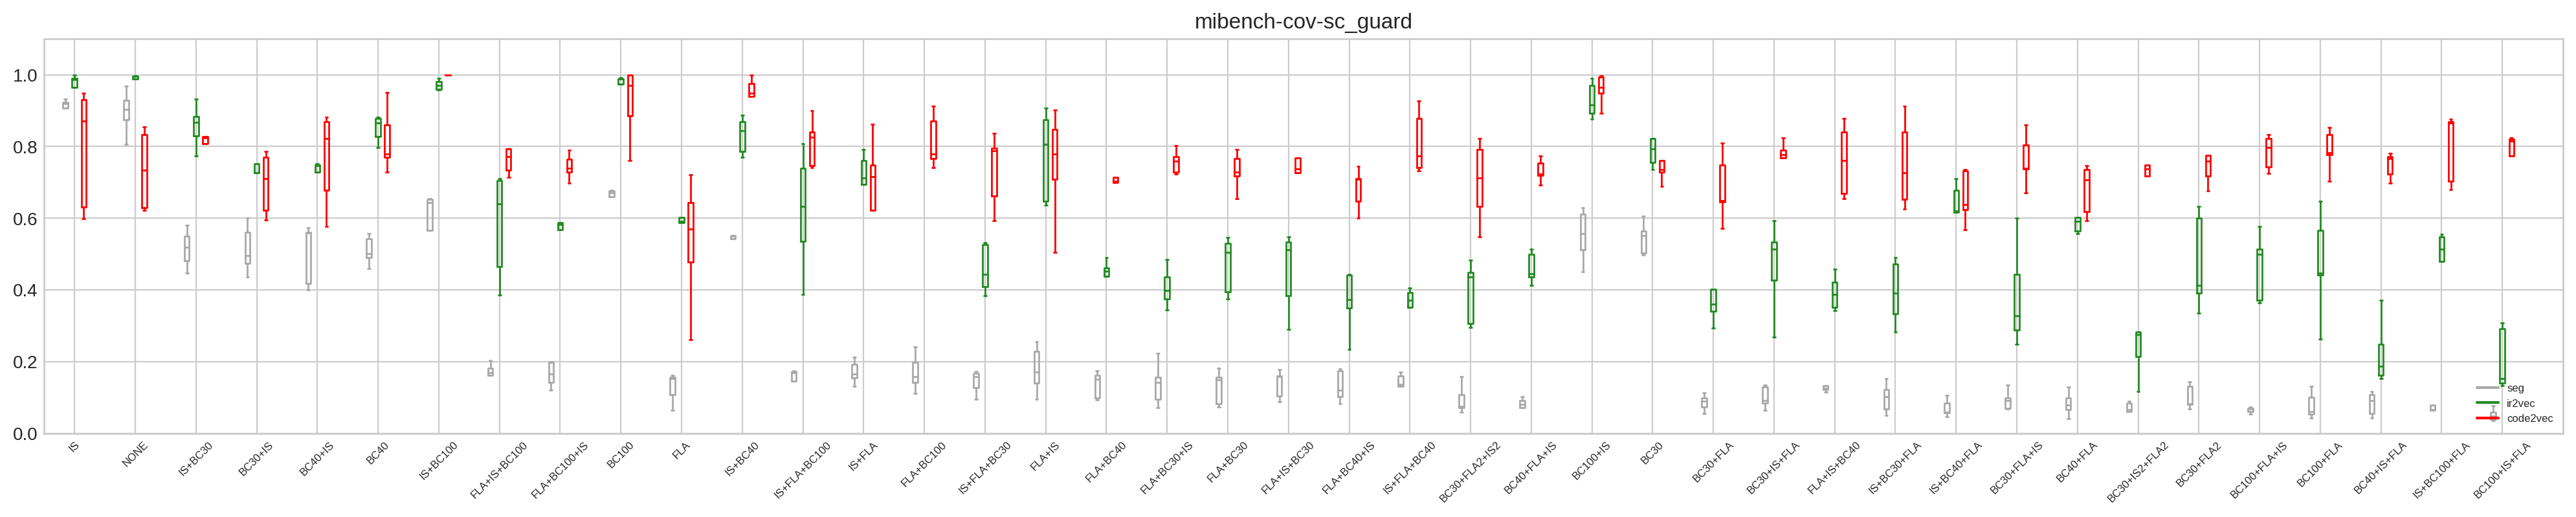

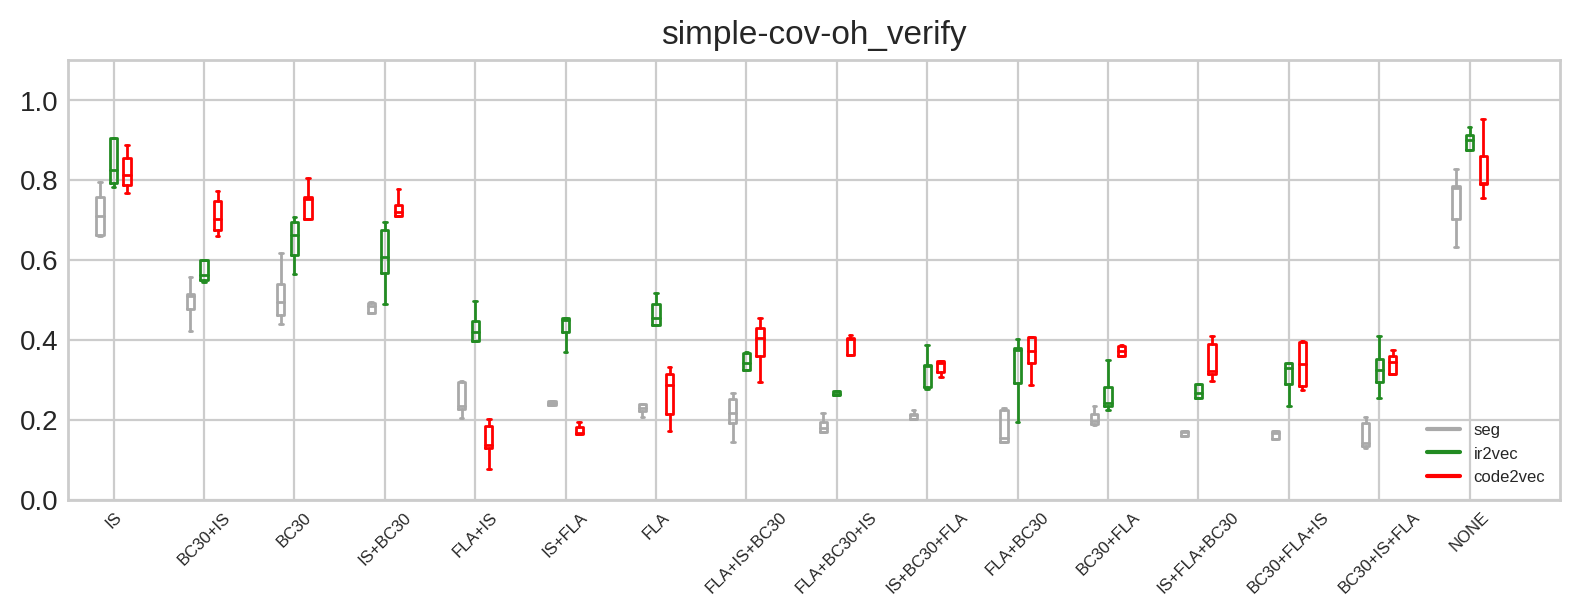

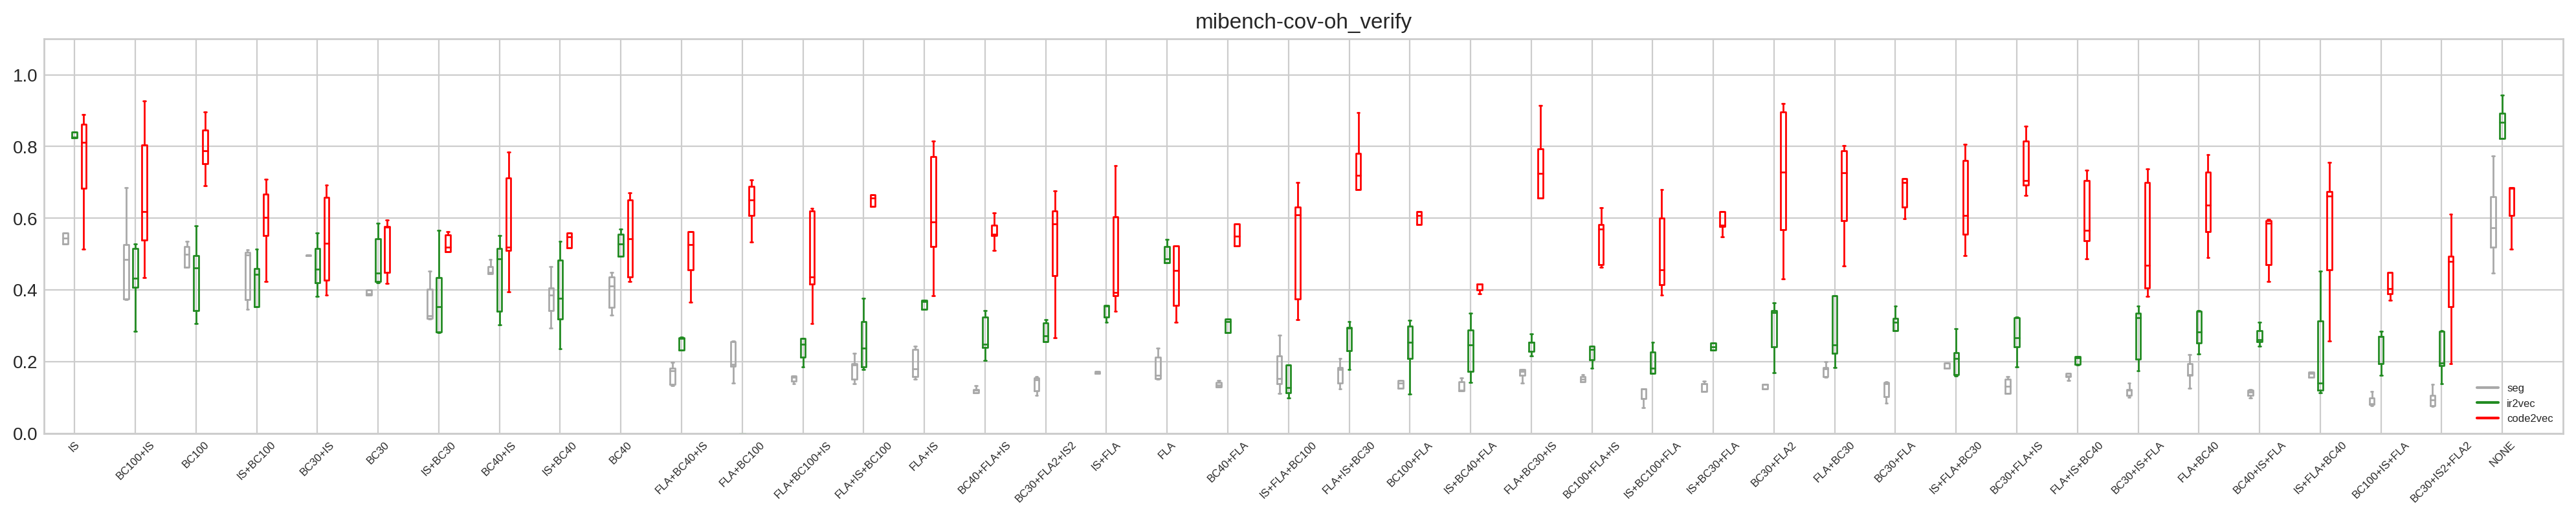

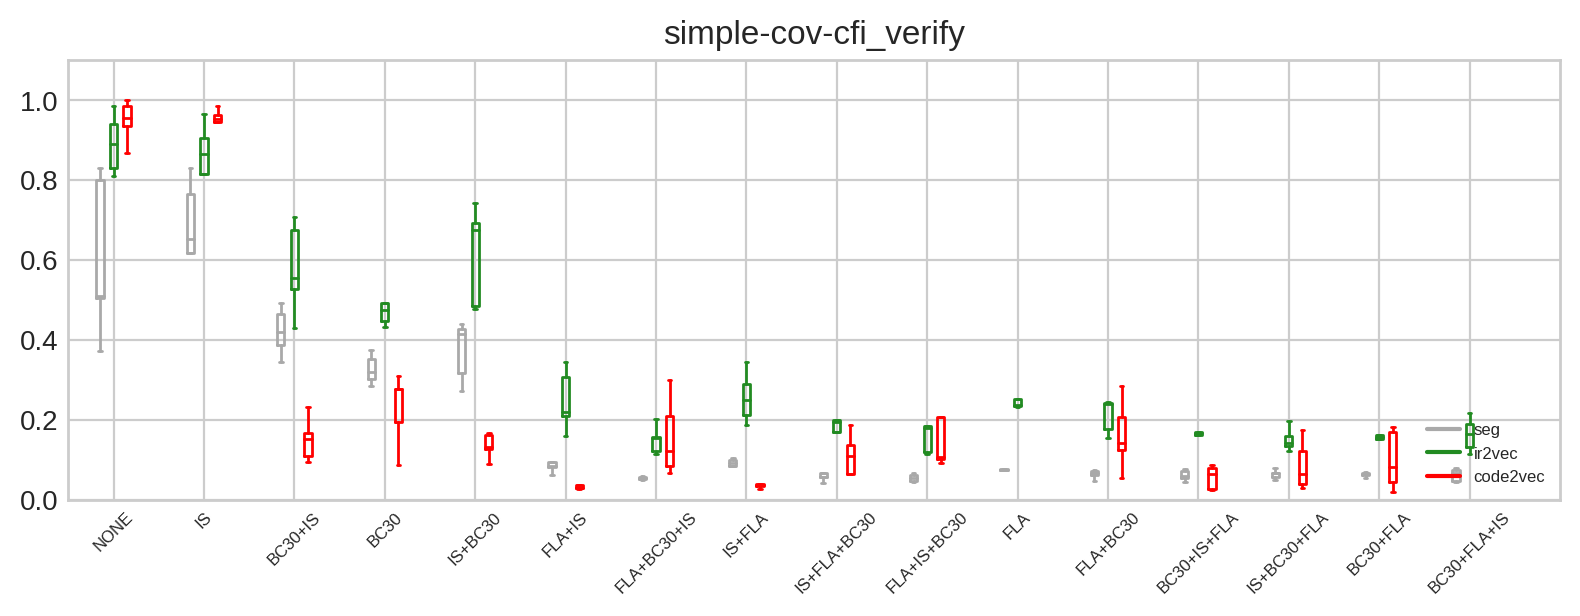

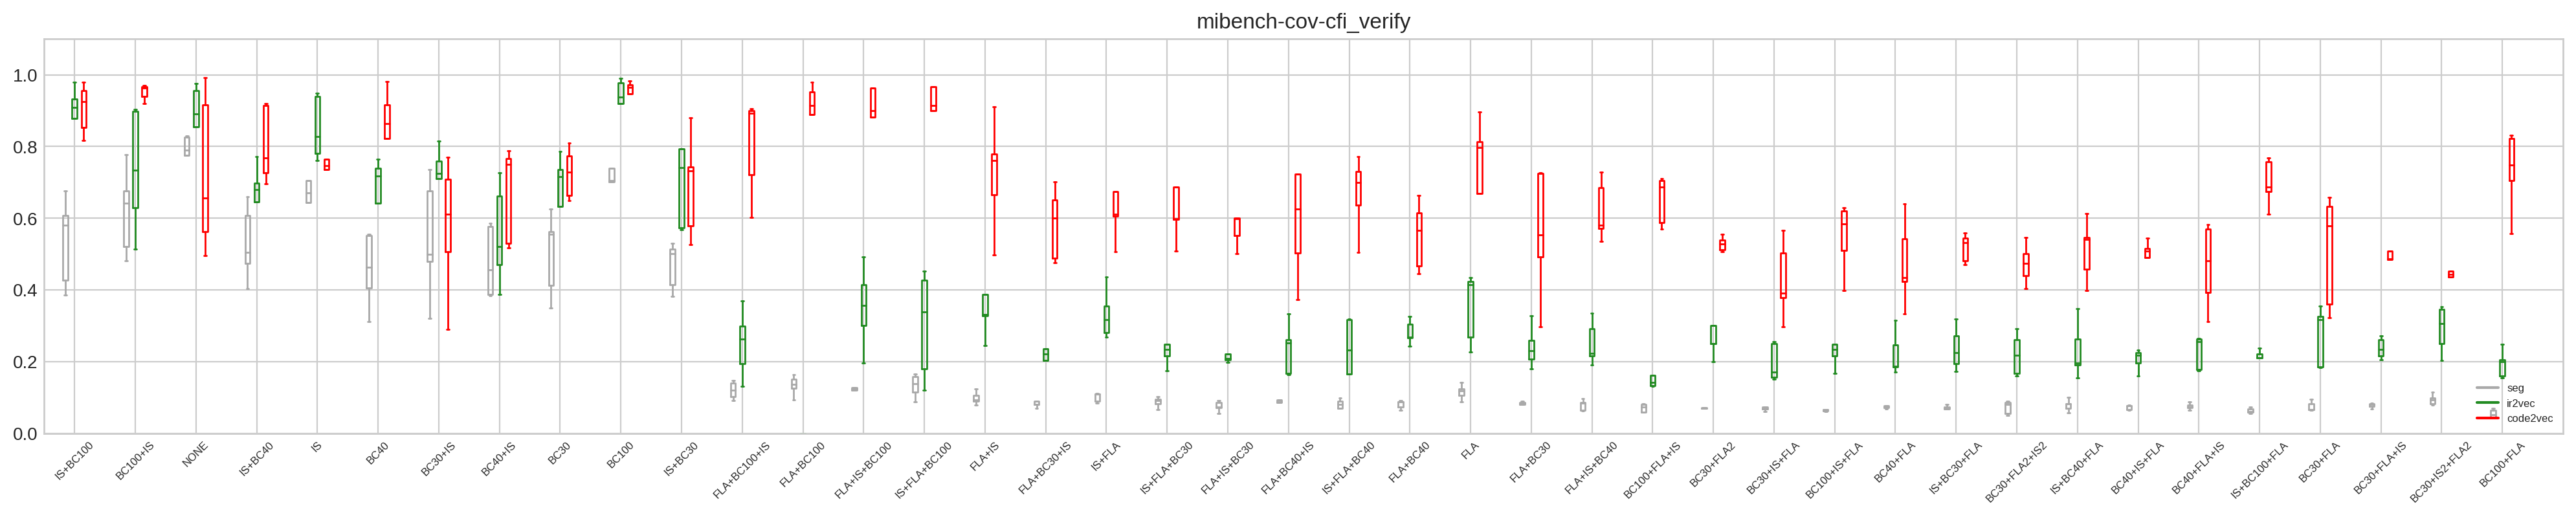

In [49]:
for protection in ['sc_guard', 'oh_verify', 'cfi_verify']:
    mibench_plot_results = get_plot_results(df, 'mibench-cov', protection)
    mibench_data_labels = sorted(
        mibench_plot_results.keys(), 
        key=lambda key: median(mibench_plot_results[key]['seg + tf_idf']),
        reverse=True
    )
    
    for src_dataset in ['simple-cov', 'mibench-cov']:
        plot_results = get_plot_results(df, src_dataset, protection)
        
        data_labels = sorted(plot_results.keys(), key=lambda key: mibench_data_labels.index(key) if key in mibench_data_labels else len(mibench_data_labels))

        data_values_original = [plot_results[label]['seg'] for label in data_labels]
        data_values_with_ir2vec = [plot_results[label].get('ir2vec', [0.0]) for label in data_labels]
        data_values_code2vec = [plot_results[label].get('code2vec', [0.0]) for label in data_labels]

        plot_title = f'{src_dataset}-{protection}'
        file_name = f'plots/{plot_title}.pdf'
        plot_labels = ['seg', 'ir2vec', 'code2vec']
        data_values = [data_values_original, data_values_with_ir2vec, data_values_code2vec]
        
        draw_plot(data_labels, data_values, plot_labels, plot_title, file_name)

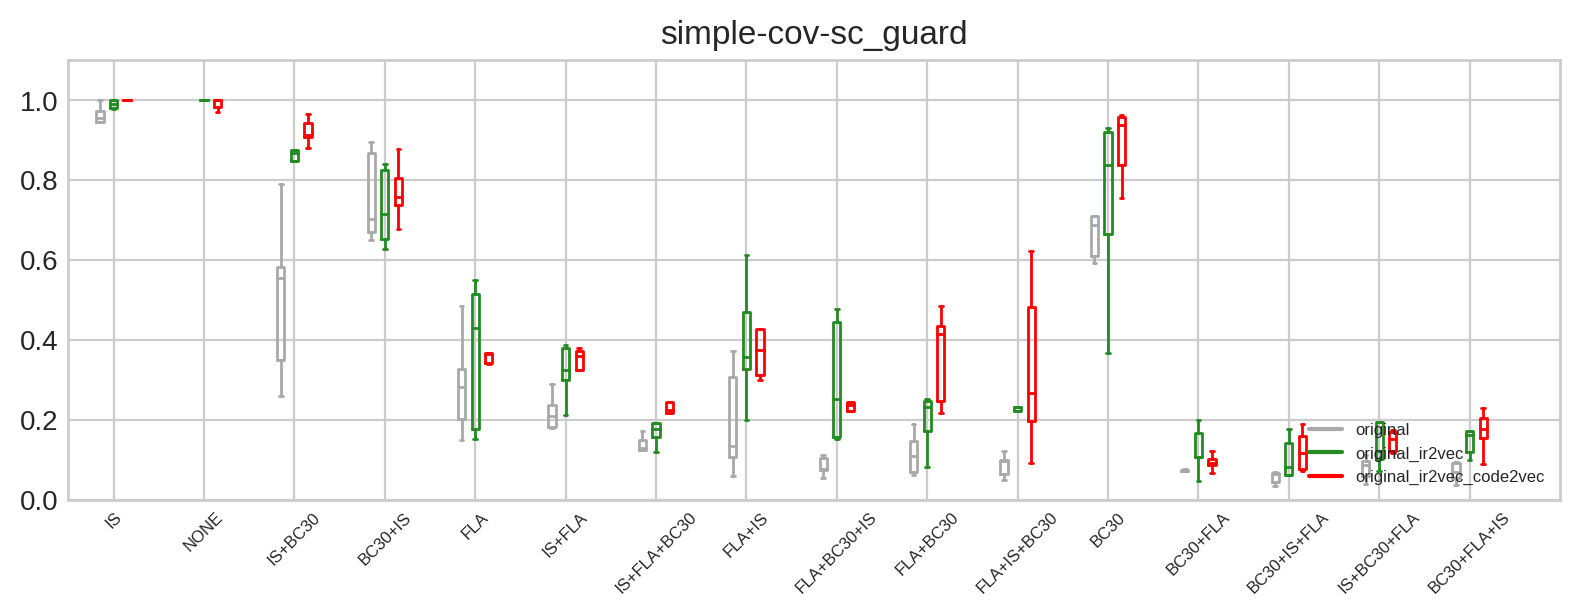

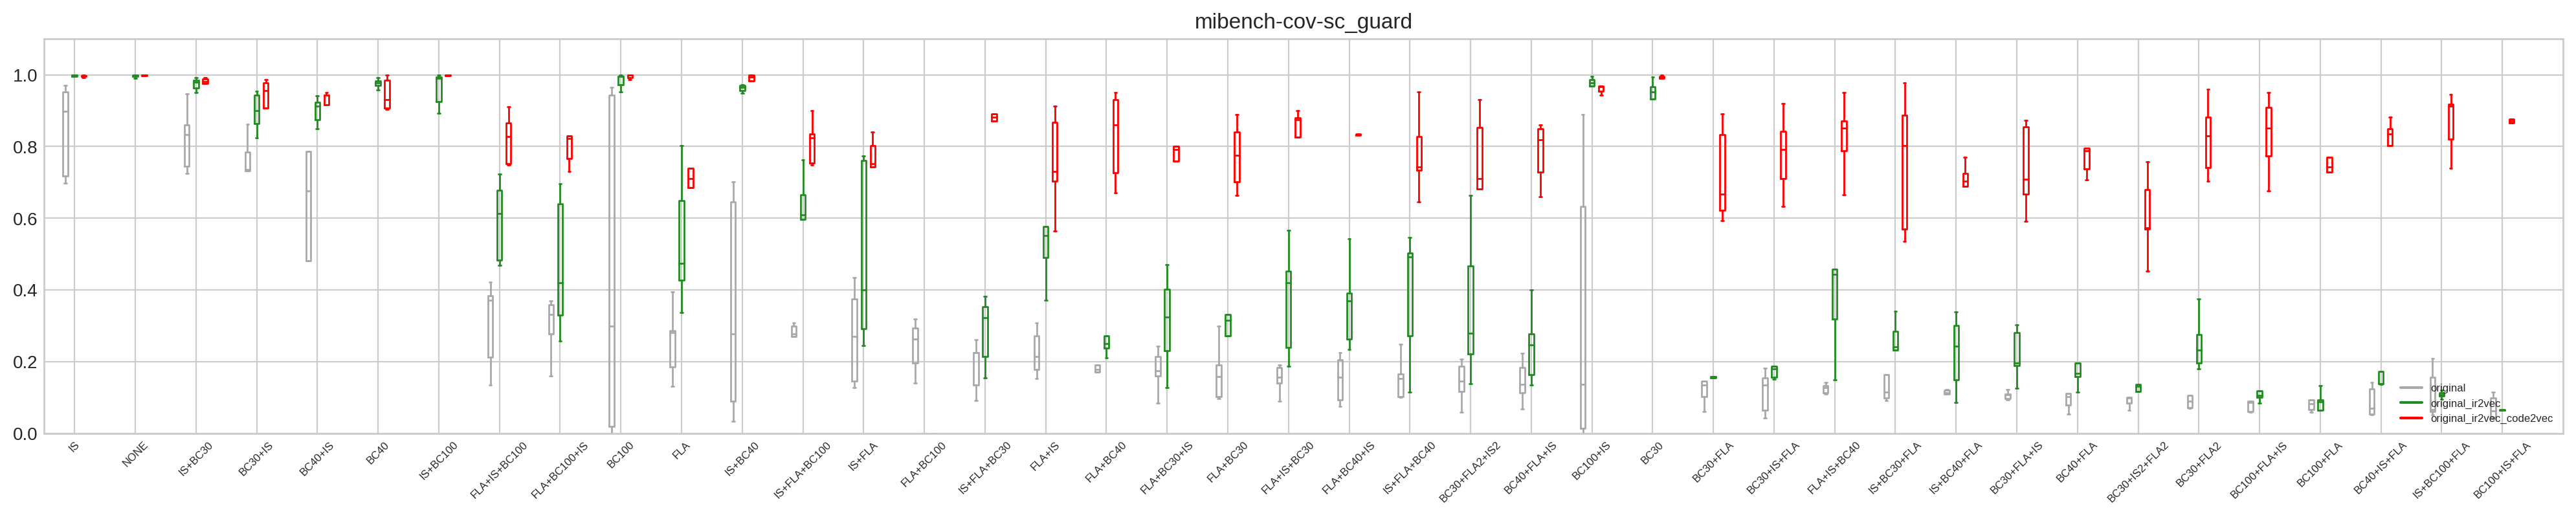

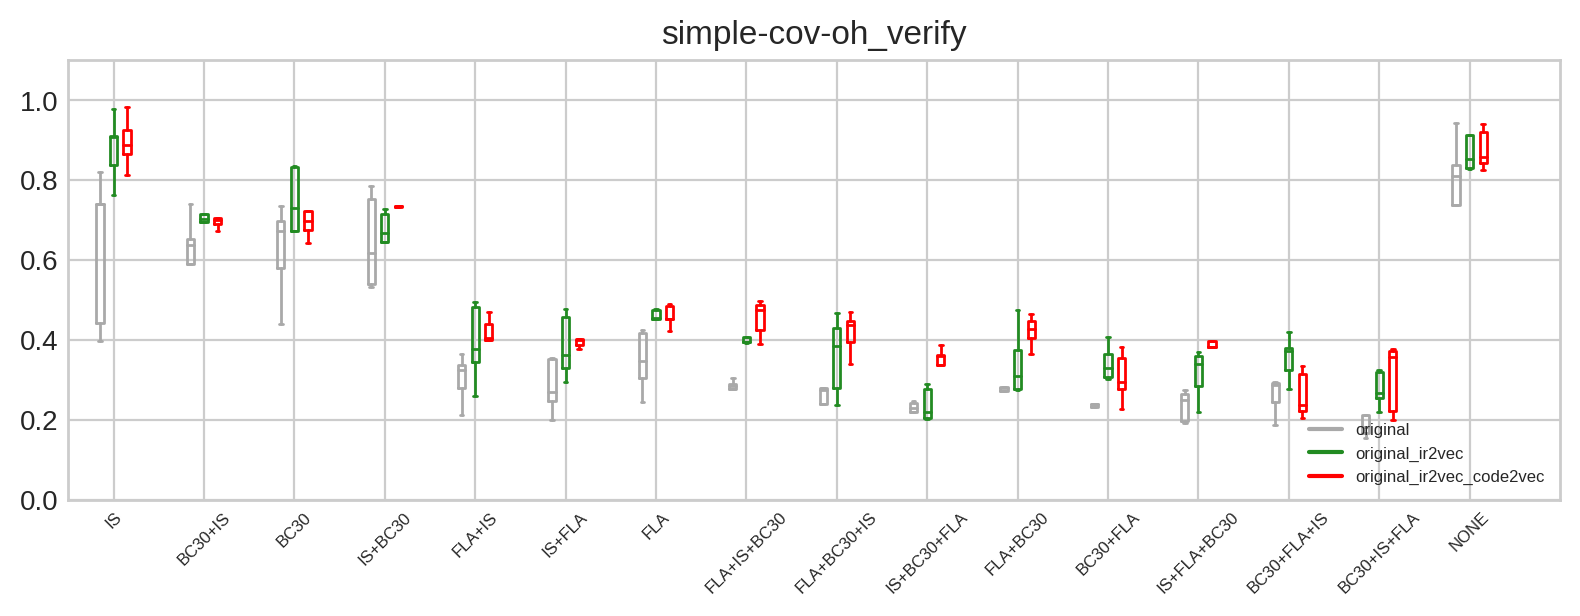

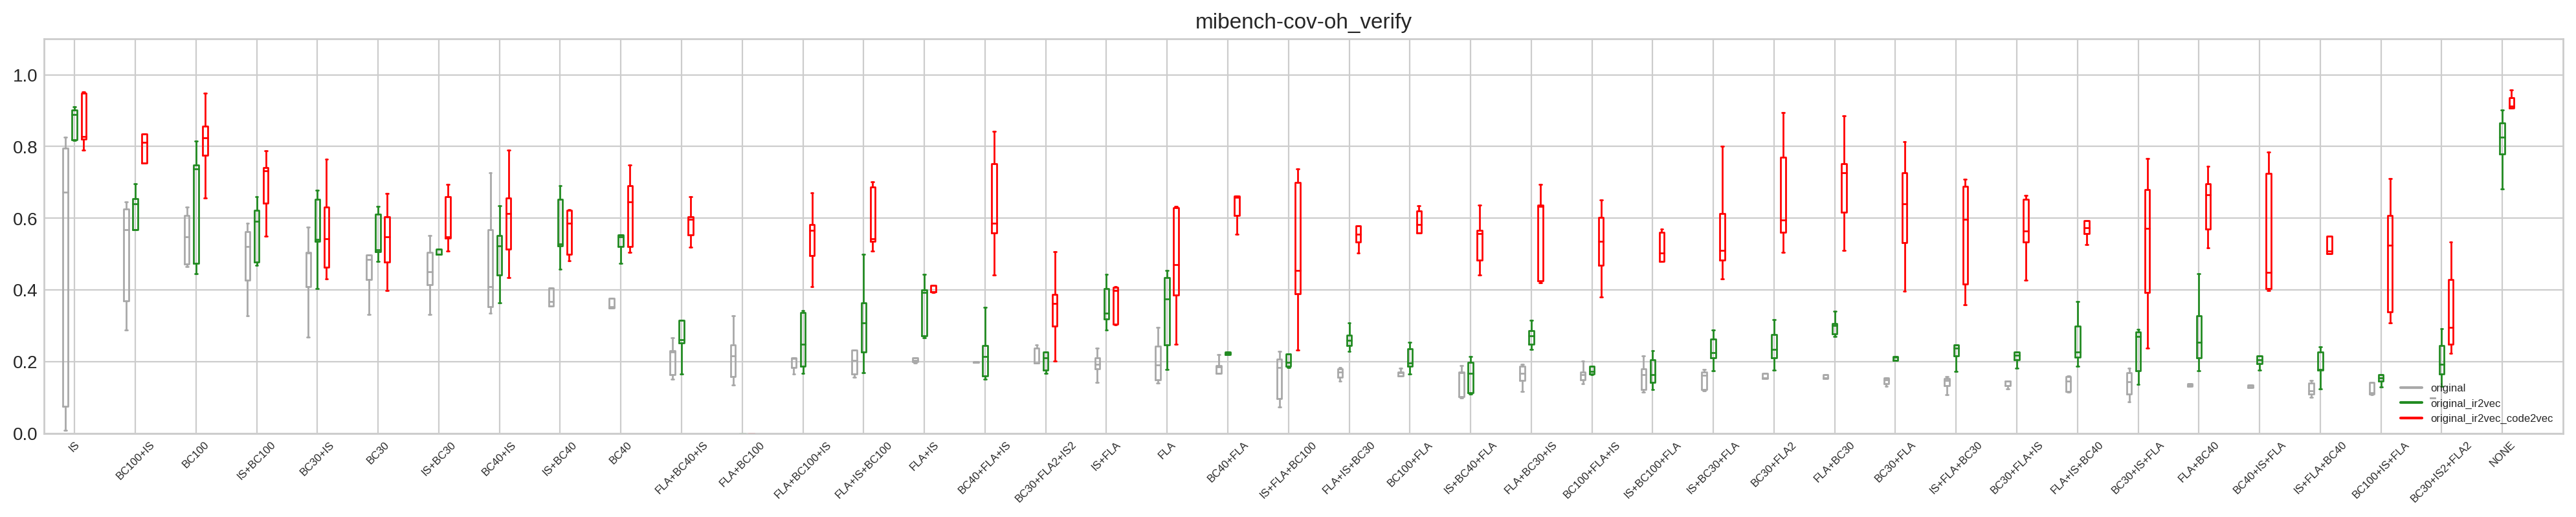

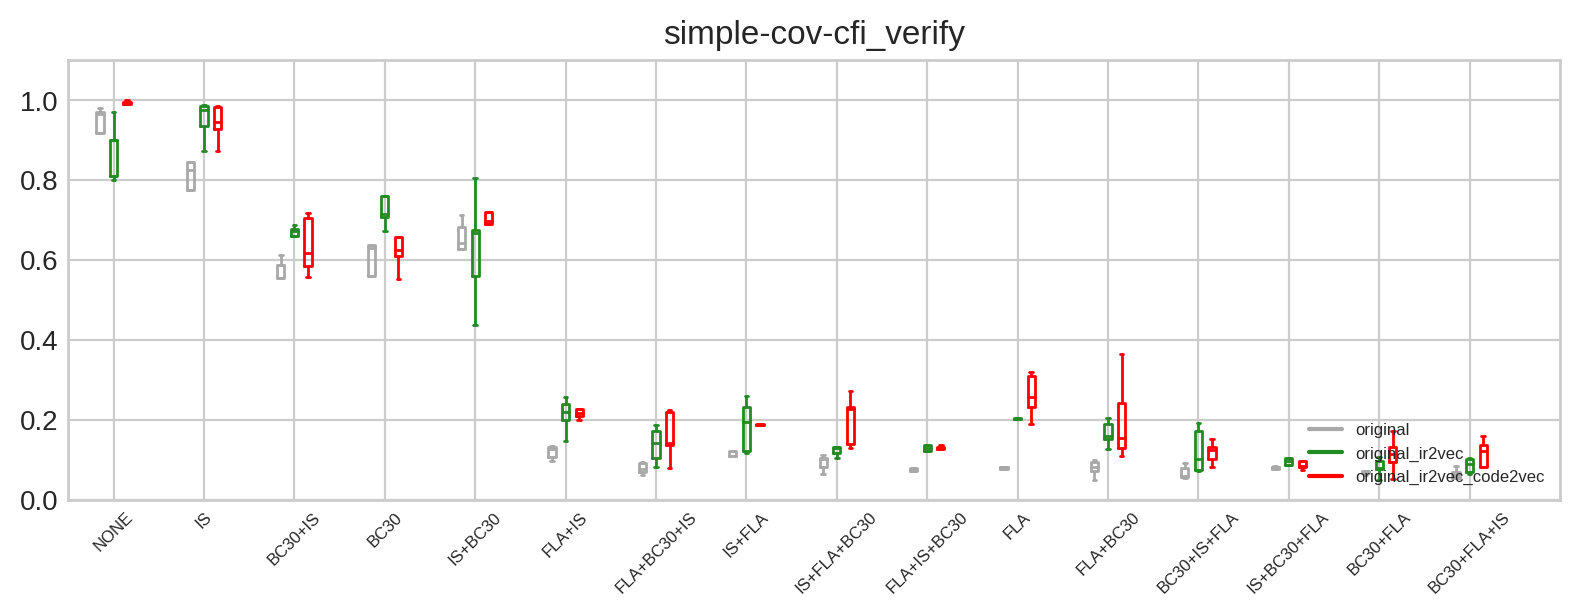

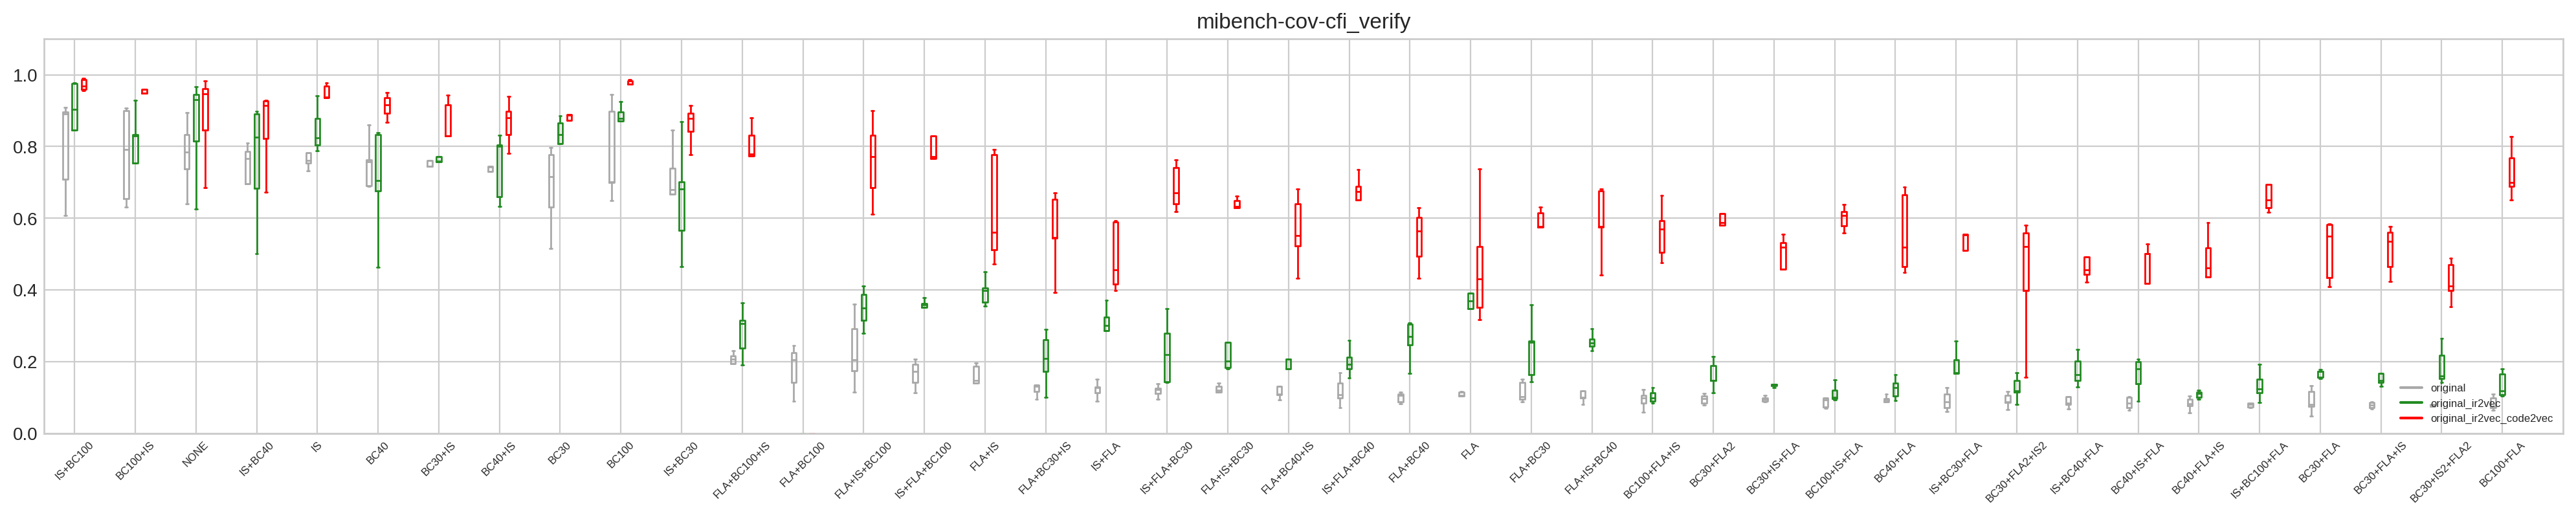

In [48]:
for protection in ['sc_guard', 'oh_verify', 'cfi_verify']:
    mibench_plot_results = get_plot_results(df, 'mibench-cov', protection)
    mibench_data_labels = sorted(
        mibench_plot_results.keys(), 
        key=lambda key: median(mibench_plot_results[key]['seg + tf_idf']),
        reverse=True
    )
    
    for src_dataset in ['simple-cov', 'mibench-cov']:
        plot_results = get_plot_results(df, src_dataset, protection)
        
        data_labels = sorted(plot_results.keys(), key=lambda key: mibench_data_labels.index(key) if key in mibench_data_labels else len(mibench_data_labels))

        data_values_original = [plot_results[label]['seg + tf_idf'] for label in data_labels]
        data_values_with_ir2vec = [plot_results[label].get('seg + tf_idf + ir2vec', 0.0) for label in data_labels]
        data_values_code2vec = [plot_results[label].get('seg + tf_idf + code2vec + ir2vec', 0.0) for label in data_labels]

        plot_title = f'{src_dataset}-{protection}'
        file_name = f'plots/{plot_title}.pdf'
        plot_labels = ['original', 'original_ir2vec', 'original_ir2vec_code2vec']
        data_values = [data_values_original, data_values_with_ir2vec, data_values_code2vec]
        
        draw_plot(data_labels, data_values, plot_labels, plot_title, file_name)

## Dataset Stats

In [212]:
obfs_stats_df = get_obfuscation_stats(labeled_bc_dir)

In [213]:
obfs_stats = {}
for _, row in obfs_stats_df.iterrows():
    obfs = row['Obfuscation']
    obfs_stats[obfs] = row['Avg % IR Lines Incr.']
obfs_stats

{'NONE': 0.0,
 'IS': 22.400944269579703,
 'FLA': 107.75782262543973,
 'BC30': 113.76134049250139,
 'FLA+IS': 130.84382521755228,
 'IS+FLA': 132.31114608405852,
 'BC30+IS': 204.1589520459174,
 'IS+BC30': 209.83151268283655,
 'BC30+FLA': 302.83512312534714,
 'IS+BC30+FLA': 373.7155156452509,
 'FLA+BC30': 408.8941862618034,
 'BC30+FLA+IS': 434.1672838363266,
 'BC30+IS+FLA': 449.122847620811,
 'FLA+IS+BC30': 477.50416589520466,
 'IS+FLA+BC30': 484.1047954082578,
 'BC40': 523.8482883286721,
 'FLA+BC30+IS': 604.1080355489725,
 'IS+BC40': 727.629386370945,
 'BC40+IS': 745.6681998460326,
 'BC30+FLA2': 909.0452304154202,
 'BC40+FLA': 942.0972237110087,
 'BC100': 1006.3542082850155,
 'FLA+BC40': 1323.4133055282161,
 'IS+BC40+FLA': 1347.941779787369,
 'BC40+FLA+IS': 1349.7241008000467,
 'BC40+IS+FLA': 1437.948990927606,
 'FLA+IS+BC40': 1527.280644909812,
 'IS+BC100': 1585.2851323828922,
 'BC100+IS': 1677.8652101462694,
 'IS+FLA+BC40': 1700.4101336009903,
 'BC100+FLA': 1898.470556134829,
 'FLA+BC4

## Scatter Plots

In [220]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['figure.dpi'] = 200

# plt.figure(figsize=(12, 8), dpi=200)


import numpy as np

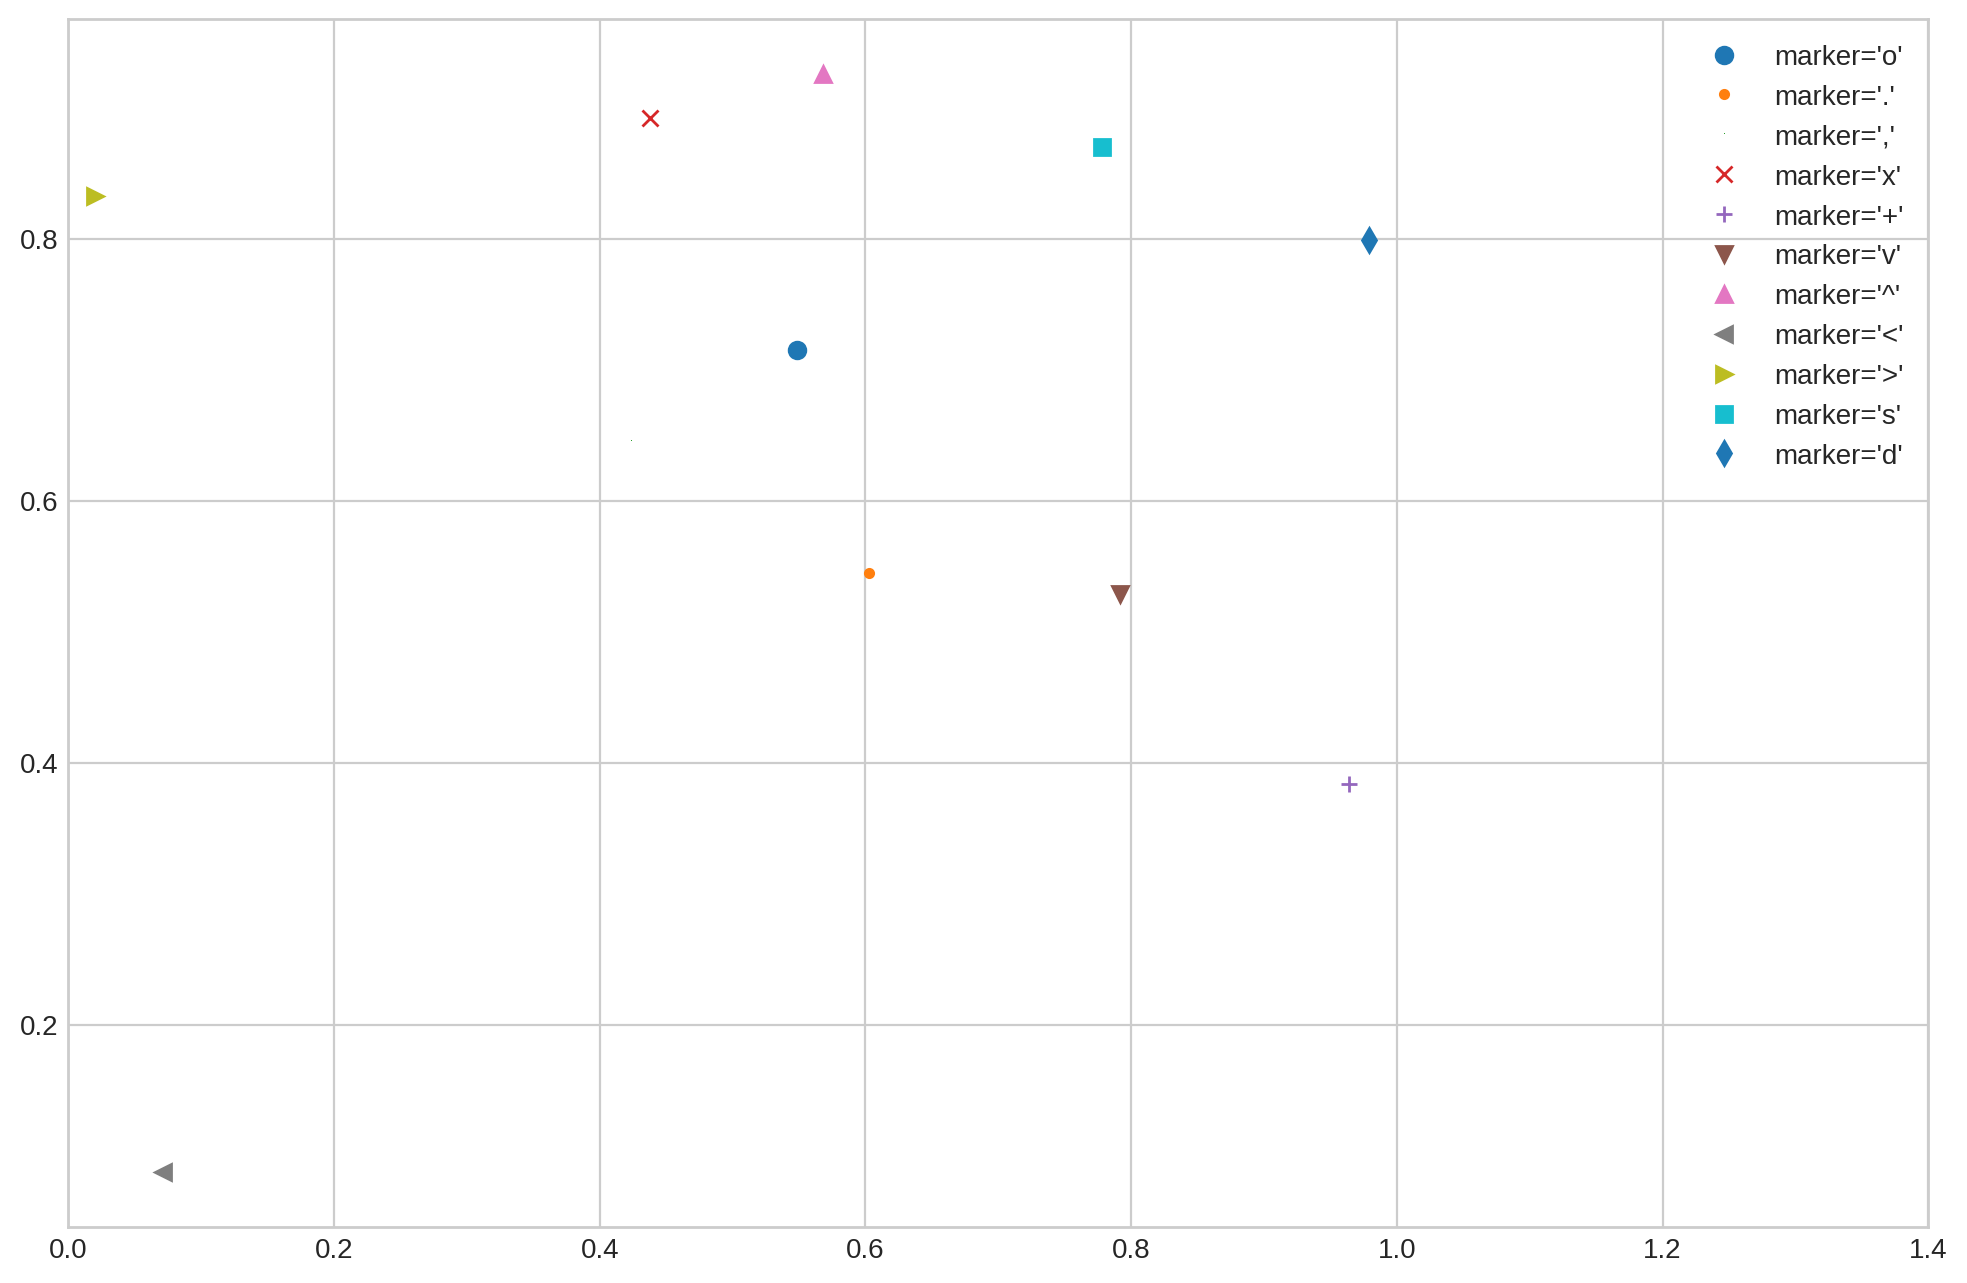

In [221]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(), rng.rand(), marker, label=f"marker='{marker}'")

plt.legend(numpoints=1)
plt.xlim(0, 1.4);

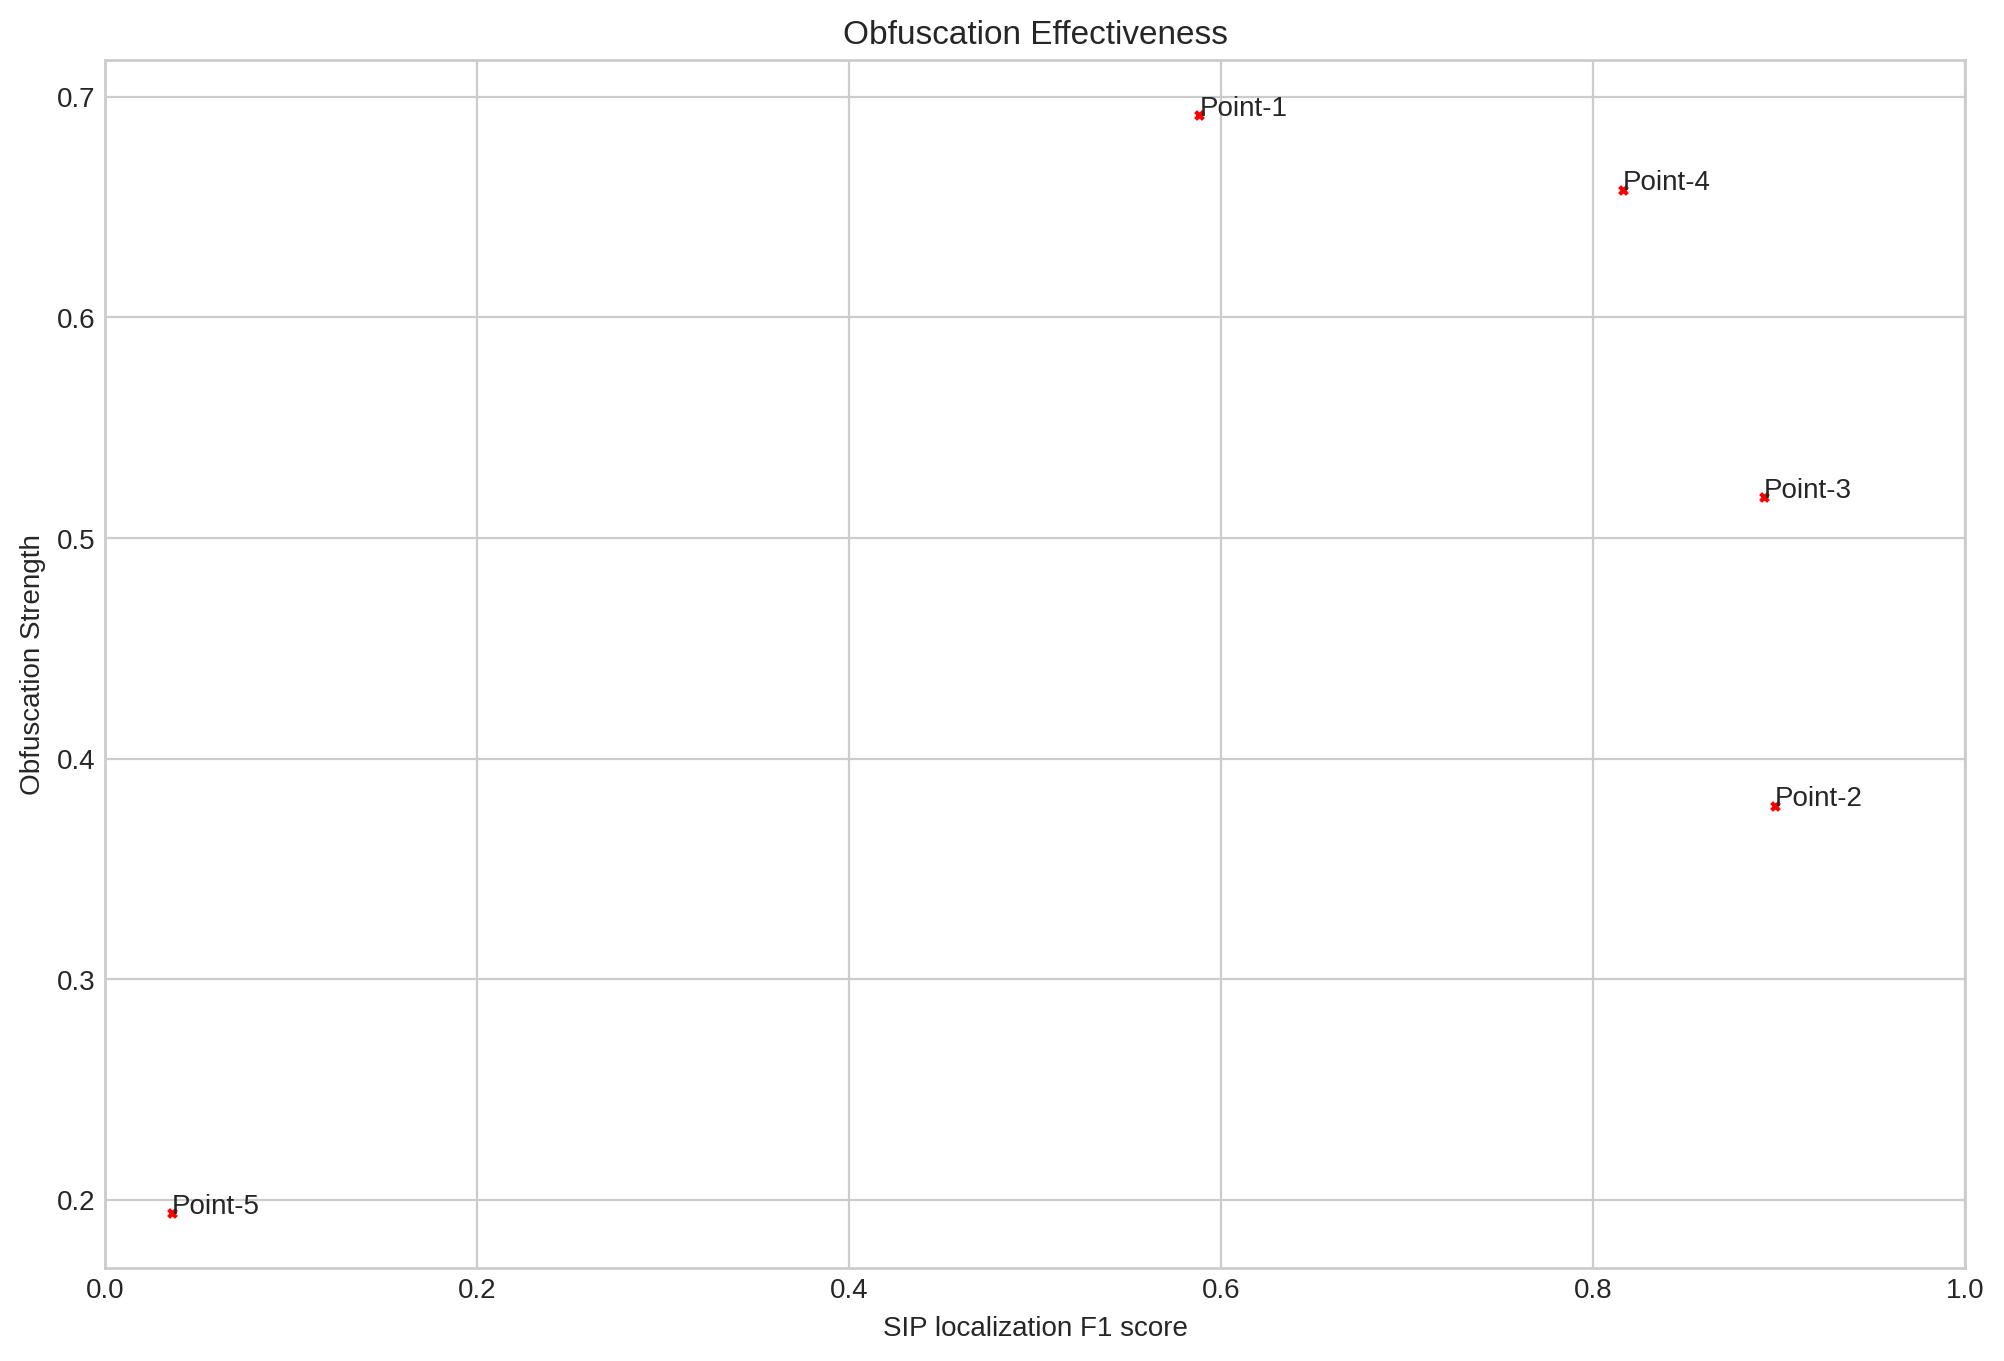

In [227]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(20)

X=np.random.rand(5)
Y=np.random.rand(5)

annotations = ['Point-1', 'Point-2', 'Point-3', 'Point-4', 'Point-5']

plt.figure(figsize=(12, 8), dpi=200)

# markers ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']

plt.scatter(X,Y, s=8, color="red", marker='x')
plt.xlabel("SIP localization F1 score")
plt.ylabel("Obfuscation Strength")
plt.title("Obfuscation Effectiveness",fontsize=12)
for i, label in enumerate(annotations):
    plt.text(X[i], Y[i],label)

plt.xlim(0, 1);
plt.xlim(0, 1);

plt.show()

In [228]:
def draw_scatter_plot(f1_score_dict, obfuscation_strength_dict, title):
    obfuscations = list(f1_score_dict.keys())
    
    X = [f1_score_dict[k] for k in obfuscations]
    Y = [obfuscation_strength_dict[k] for k in obfuscations]
    
    plt.scatter(X, Y, s=8, color='red', marker='x')
    plt.xlabel('SIP localization F1 score')
    plt.ylabel('Avg % IR Lines Incr.')
    plt.title(title, fontsize=16)
    
    
    for i, label in enumerate(obfuscations):
        plt.text(X[i], Y[i], label)

#     plt.xlim(min(f1_score_dict.values()), max(f1_score_dict.values()));
    plt.xlim(0, 1.0)
    plt.ylim(min(X), max(Y));

    plt.show()

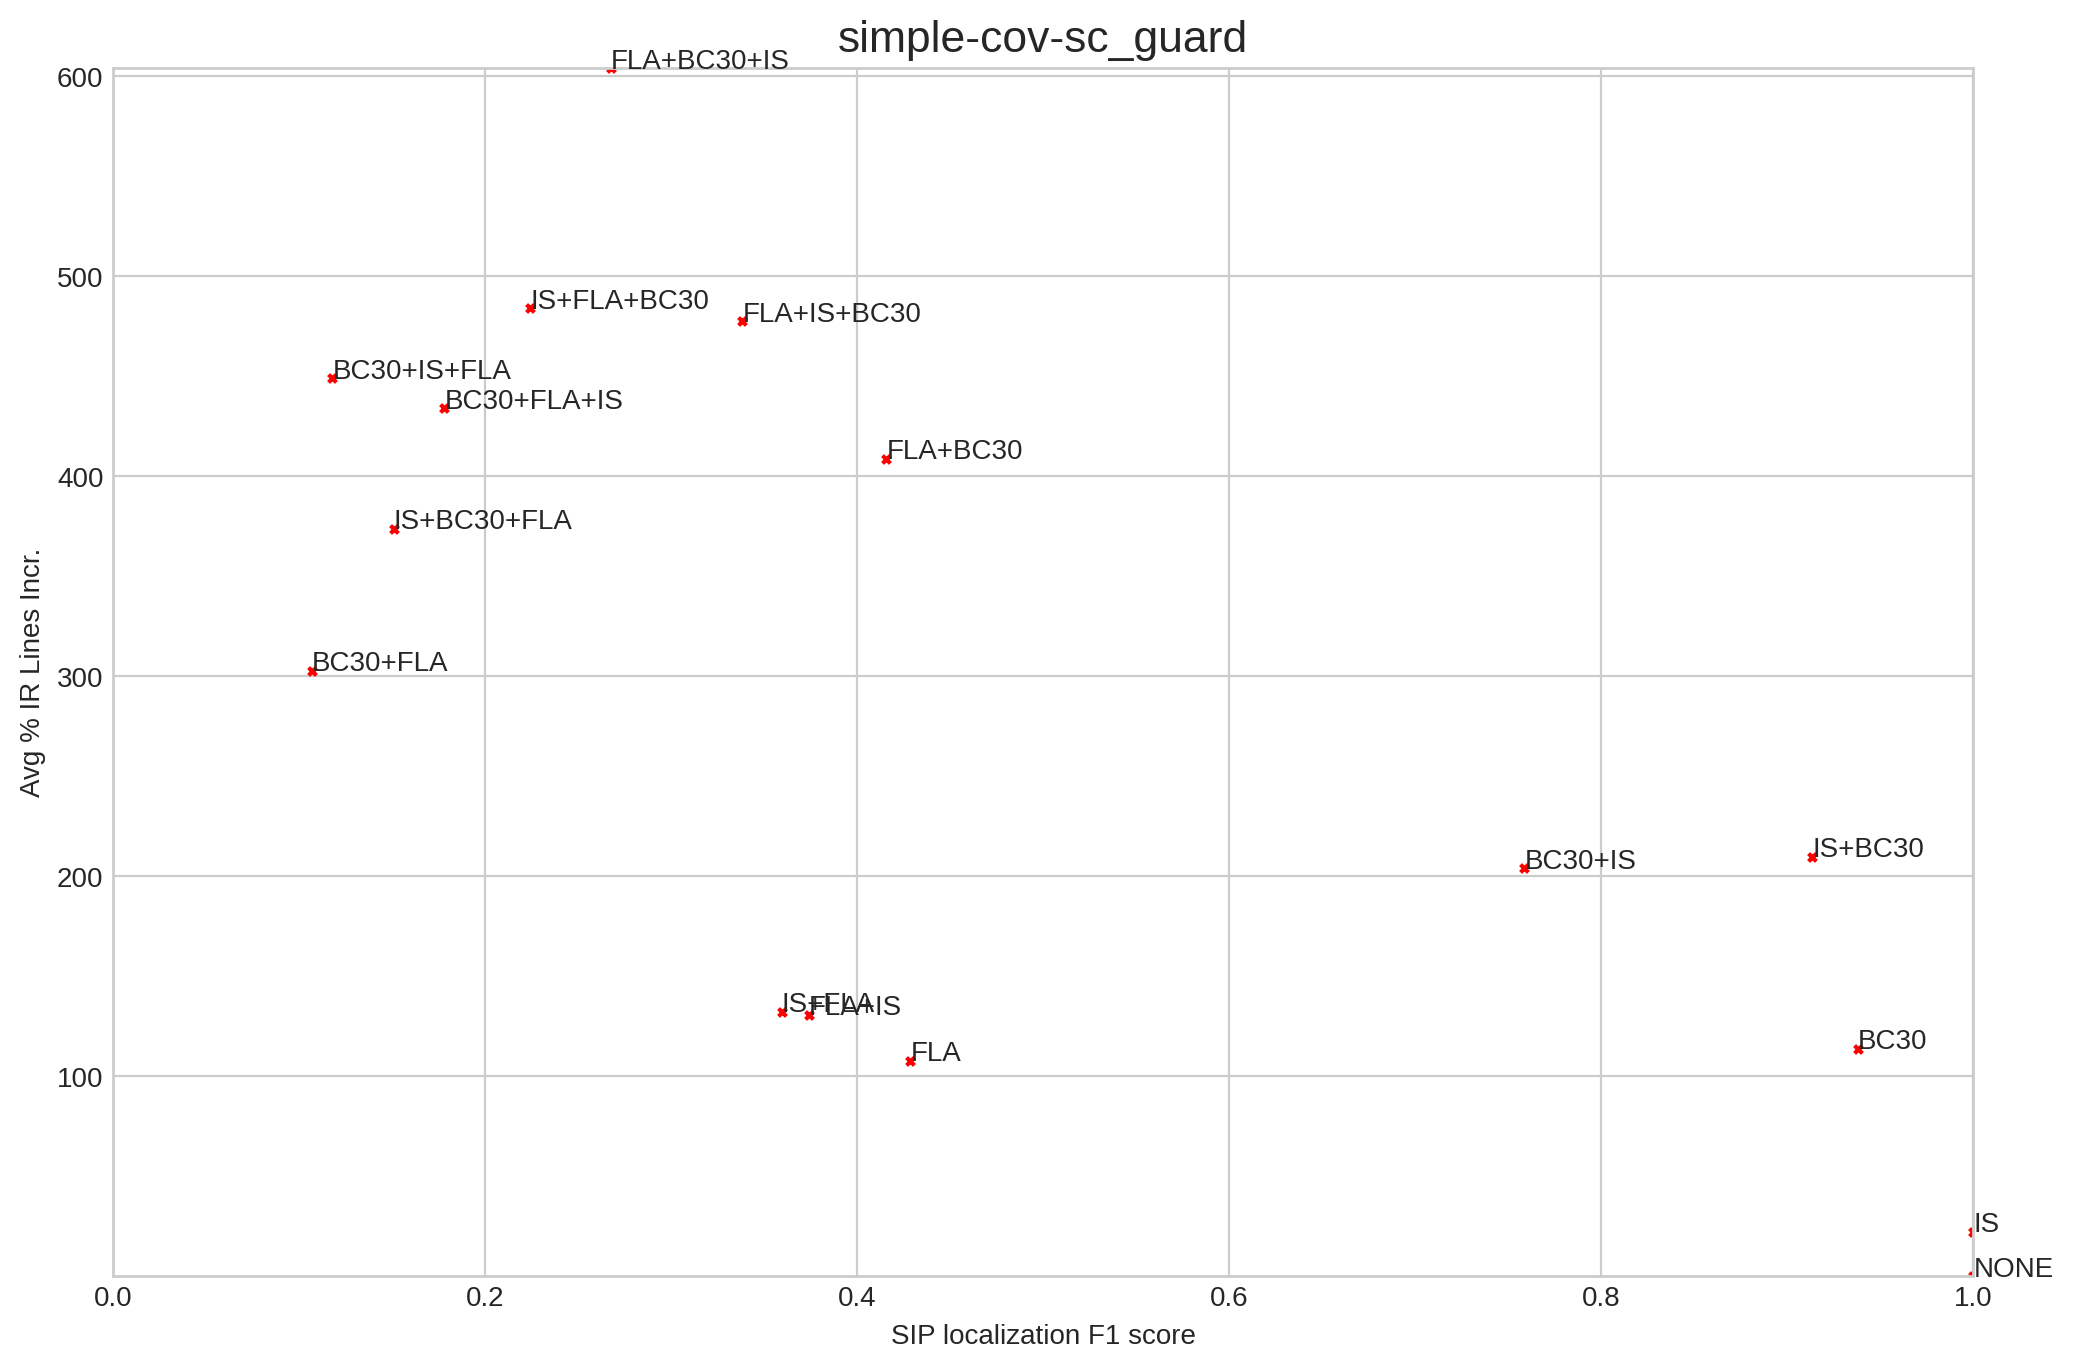

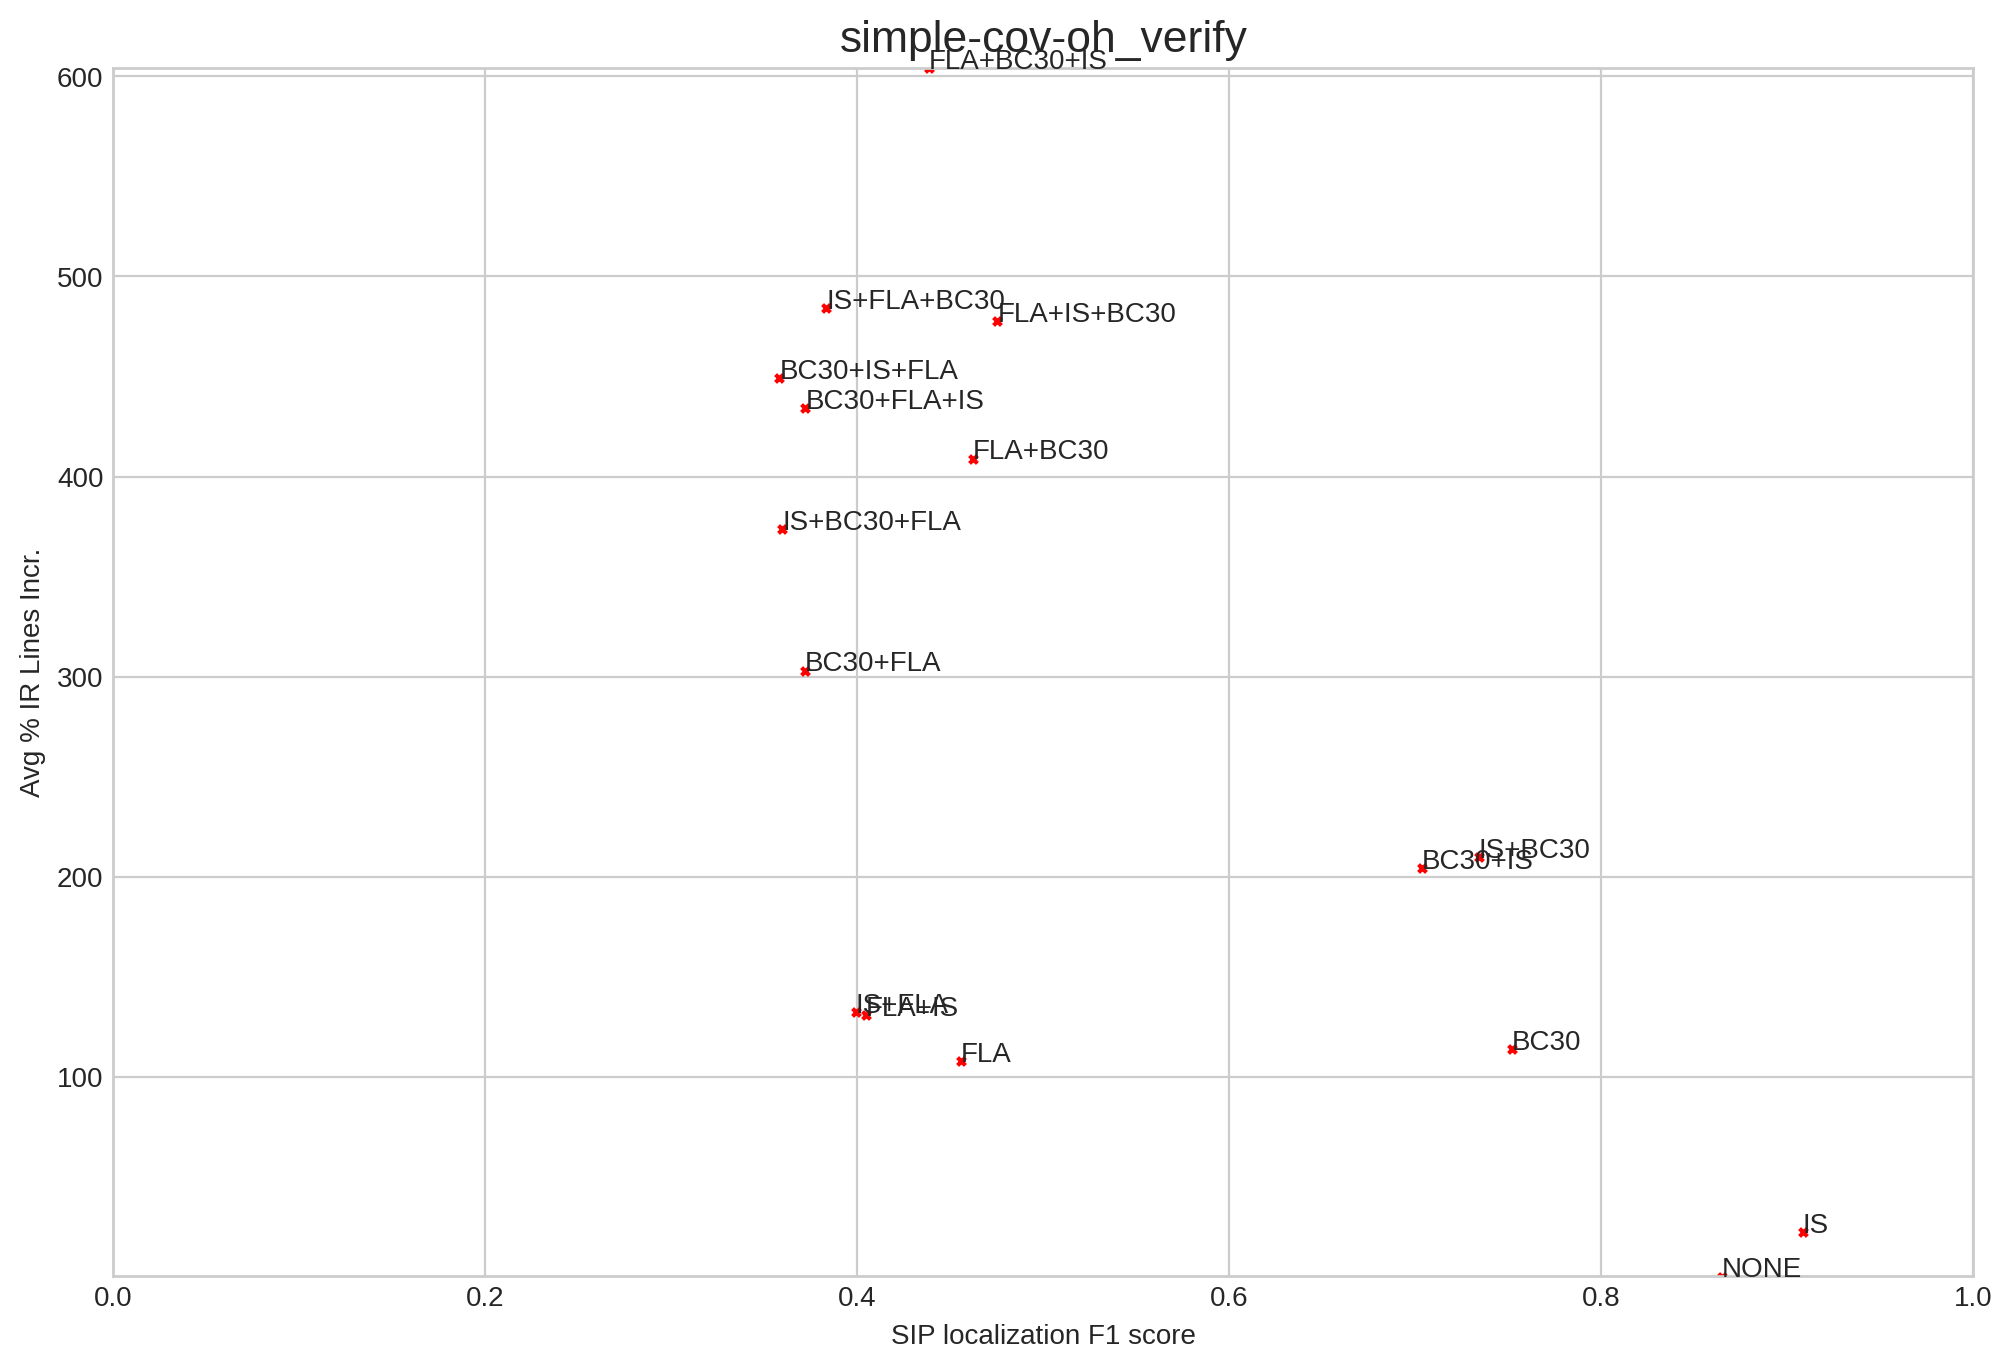

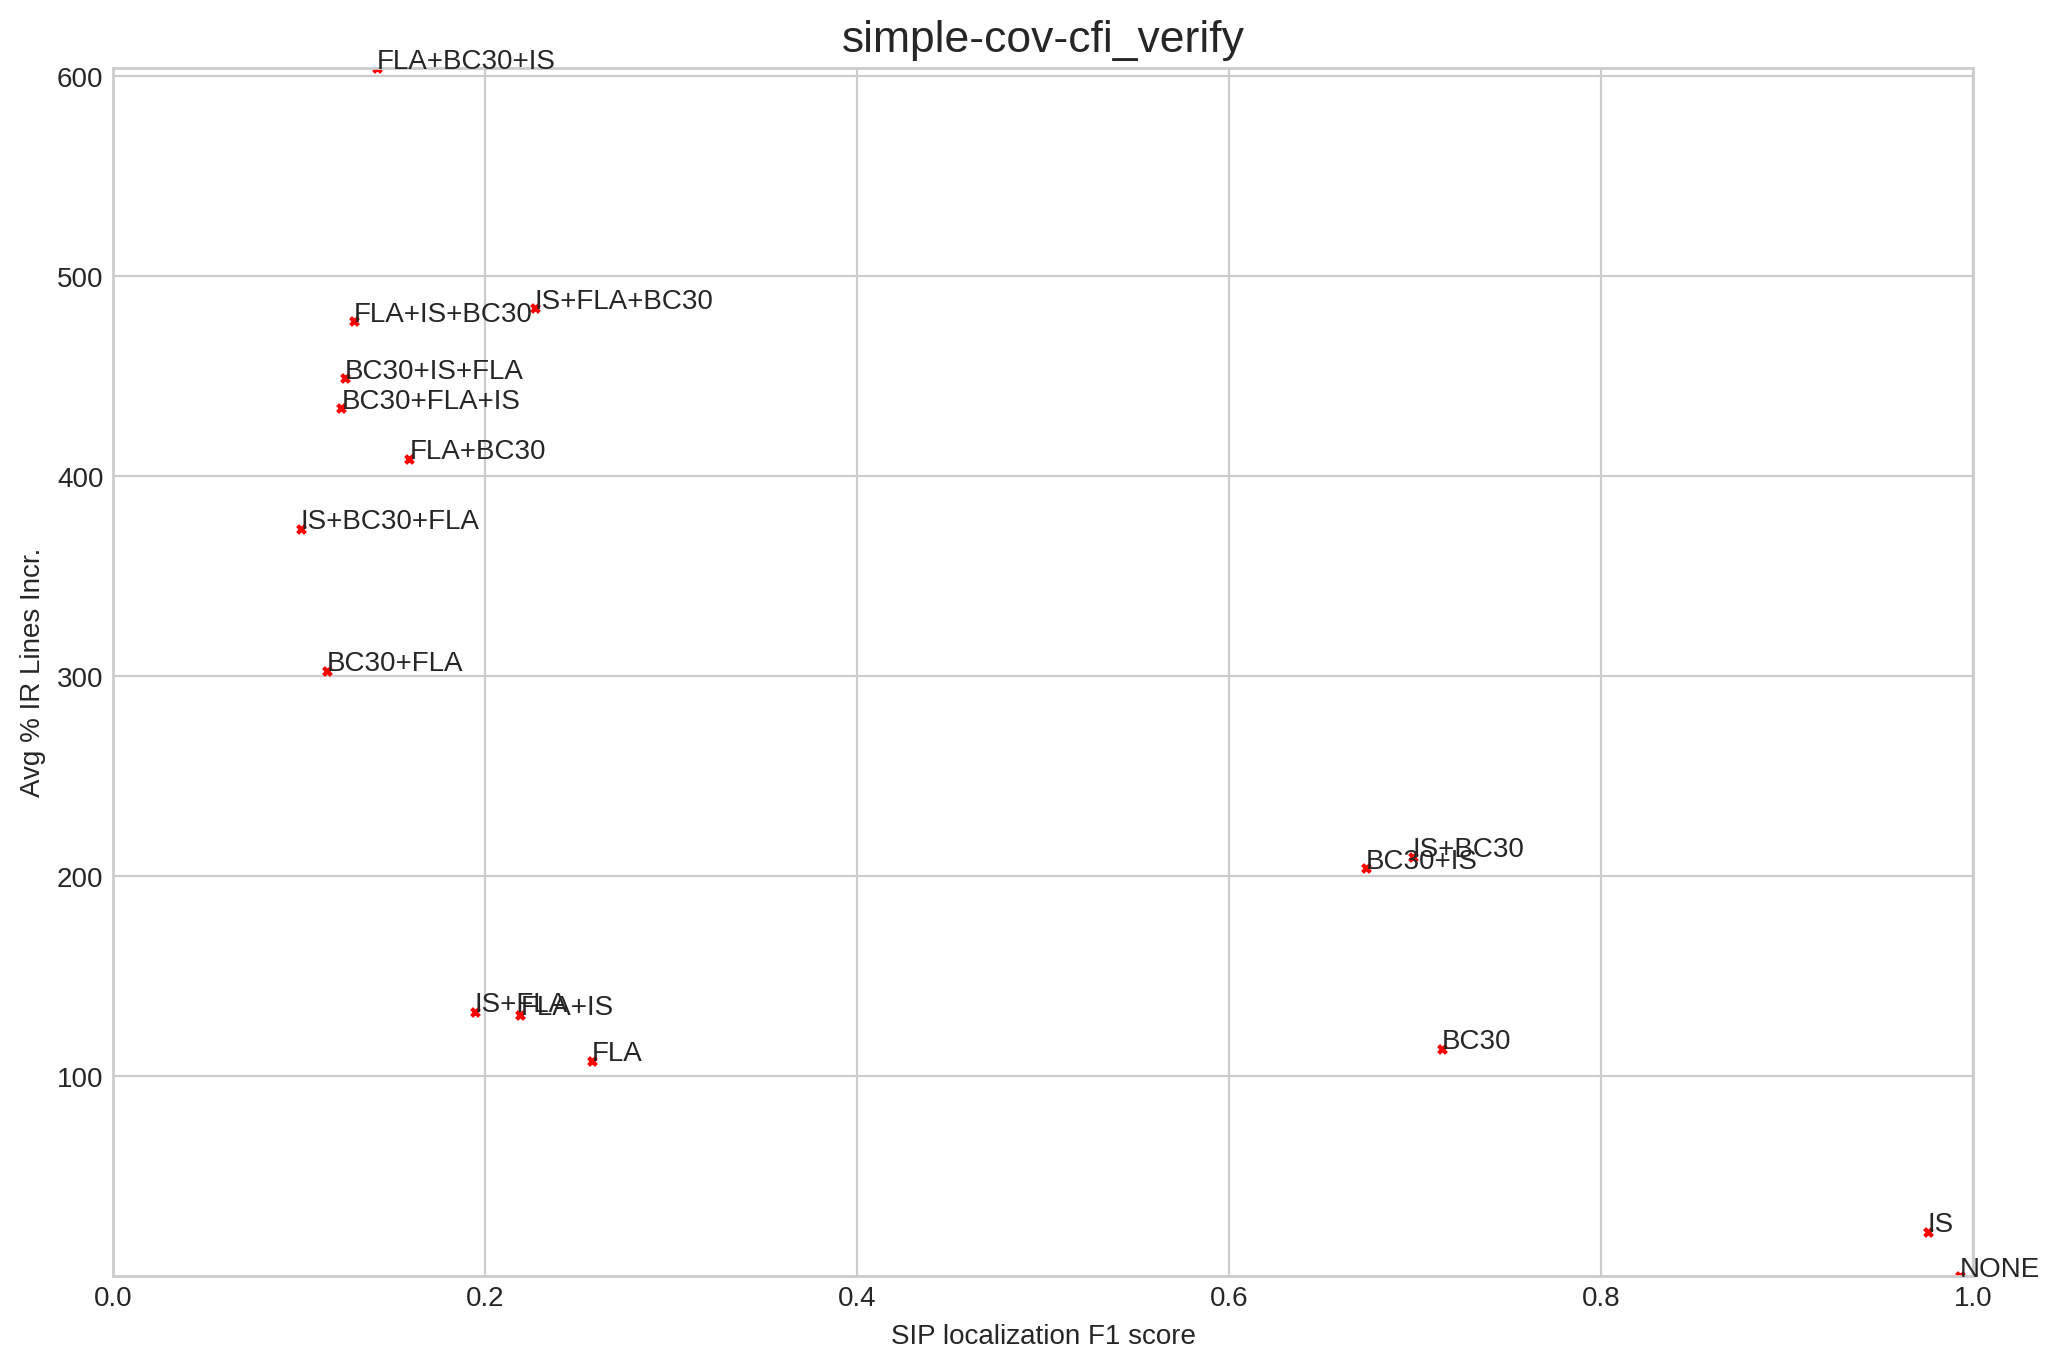

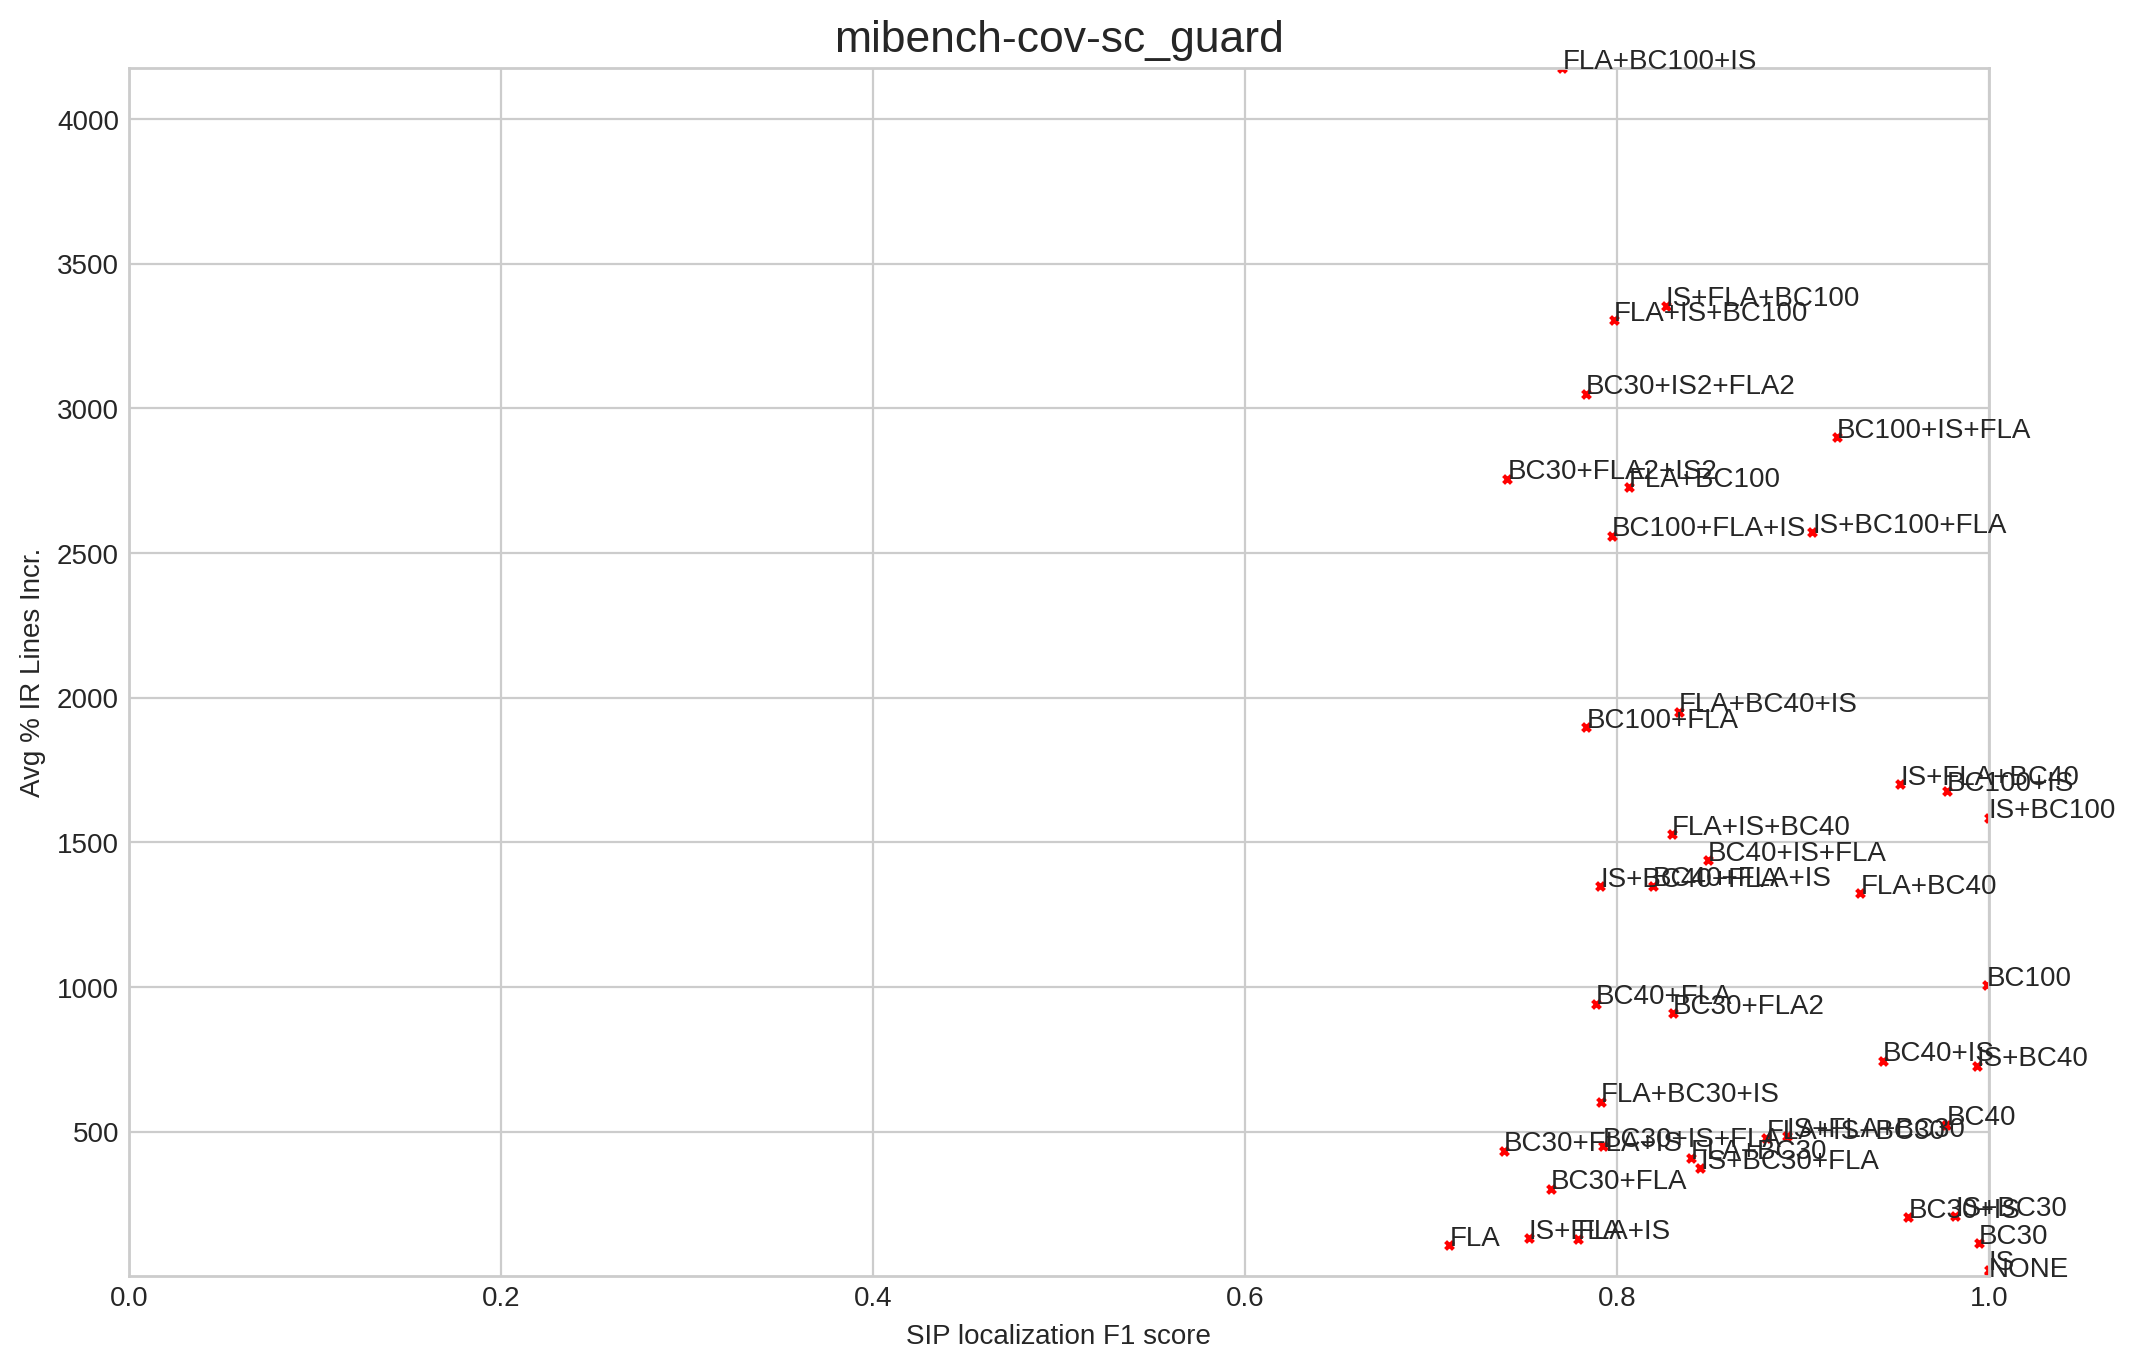

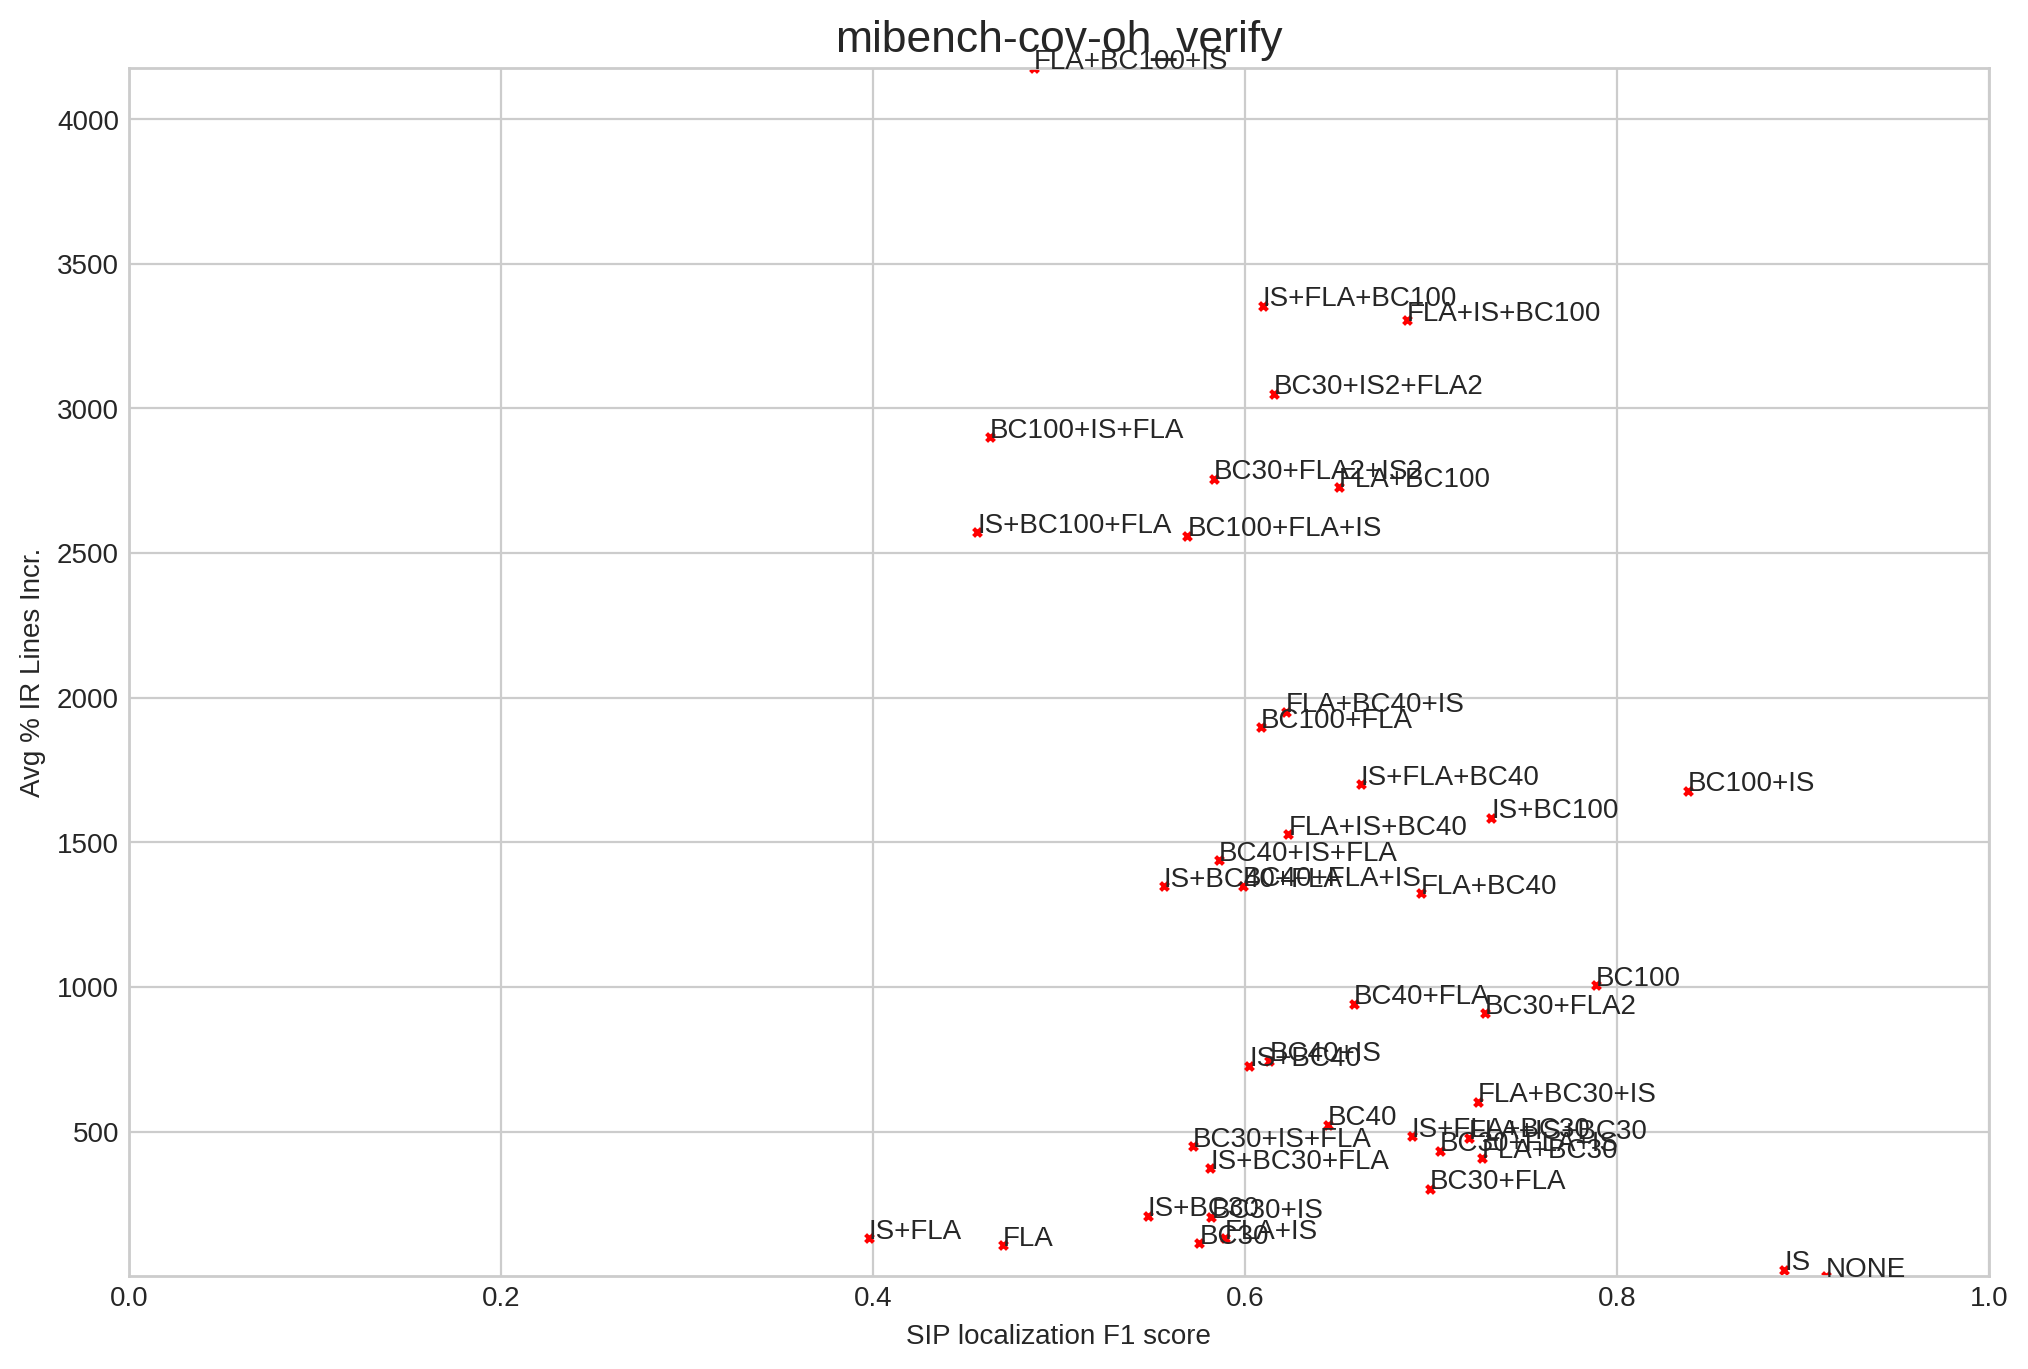

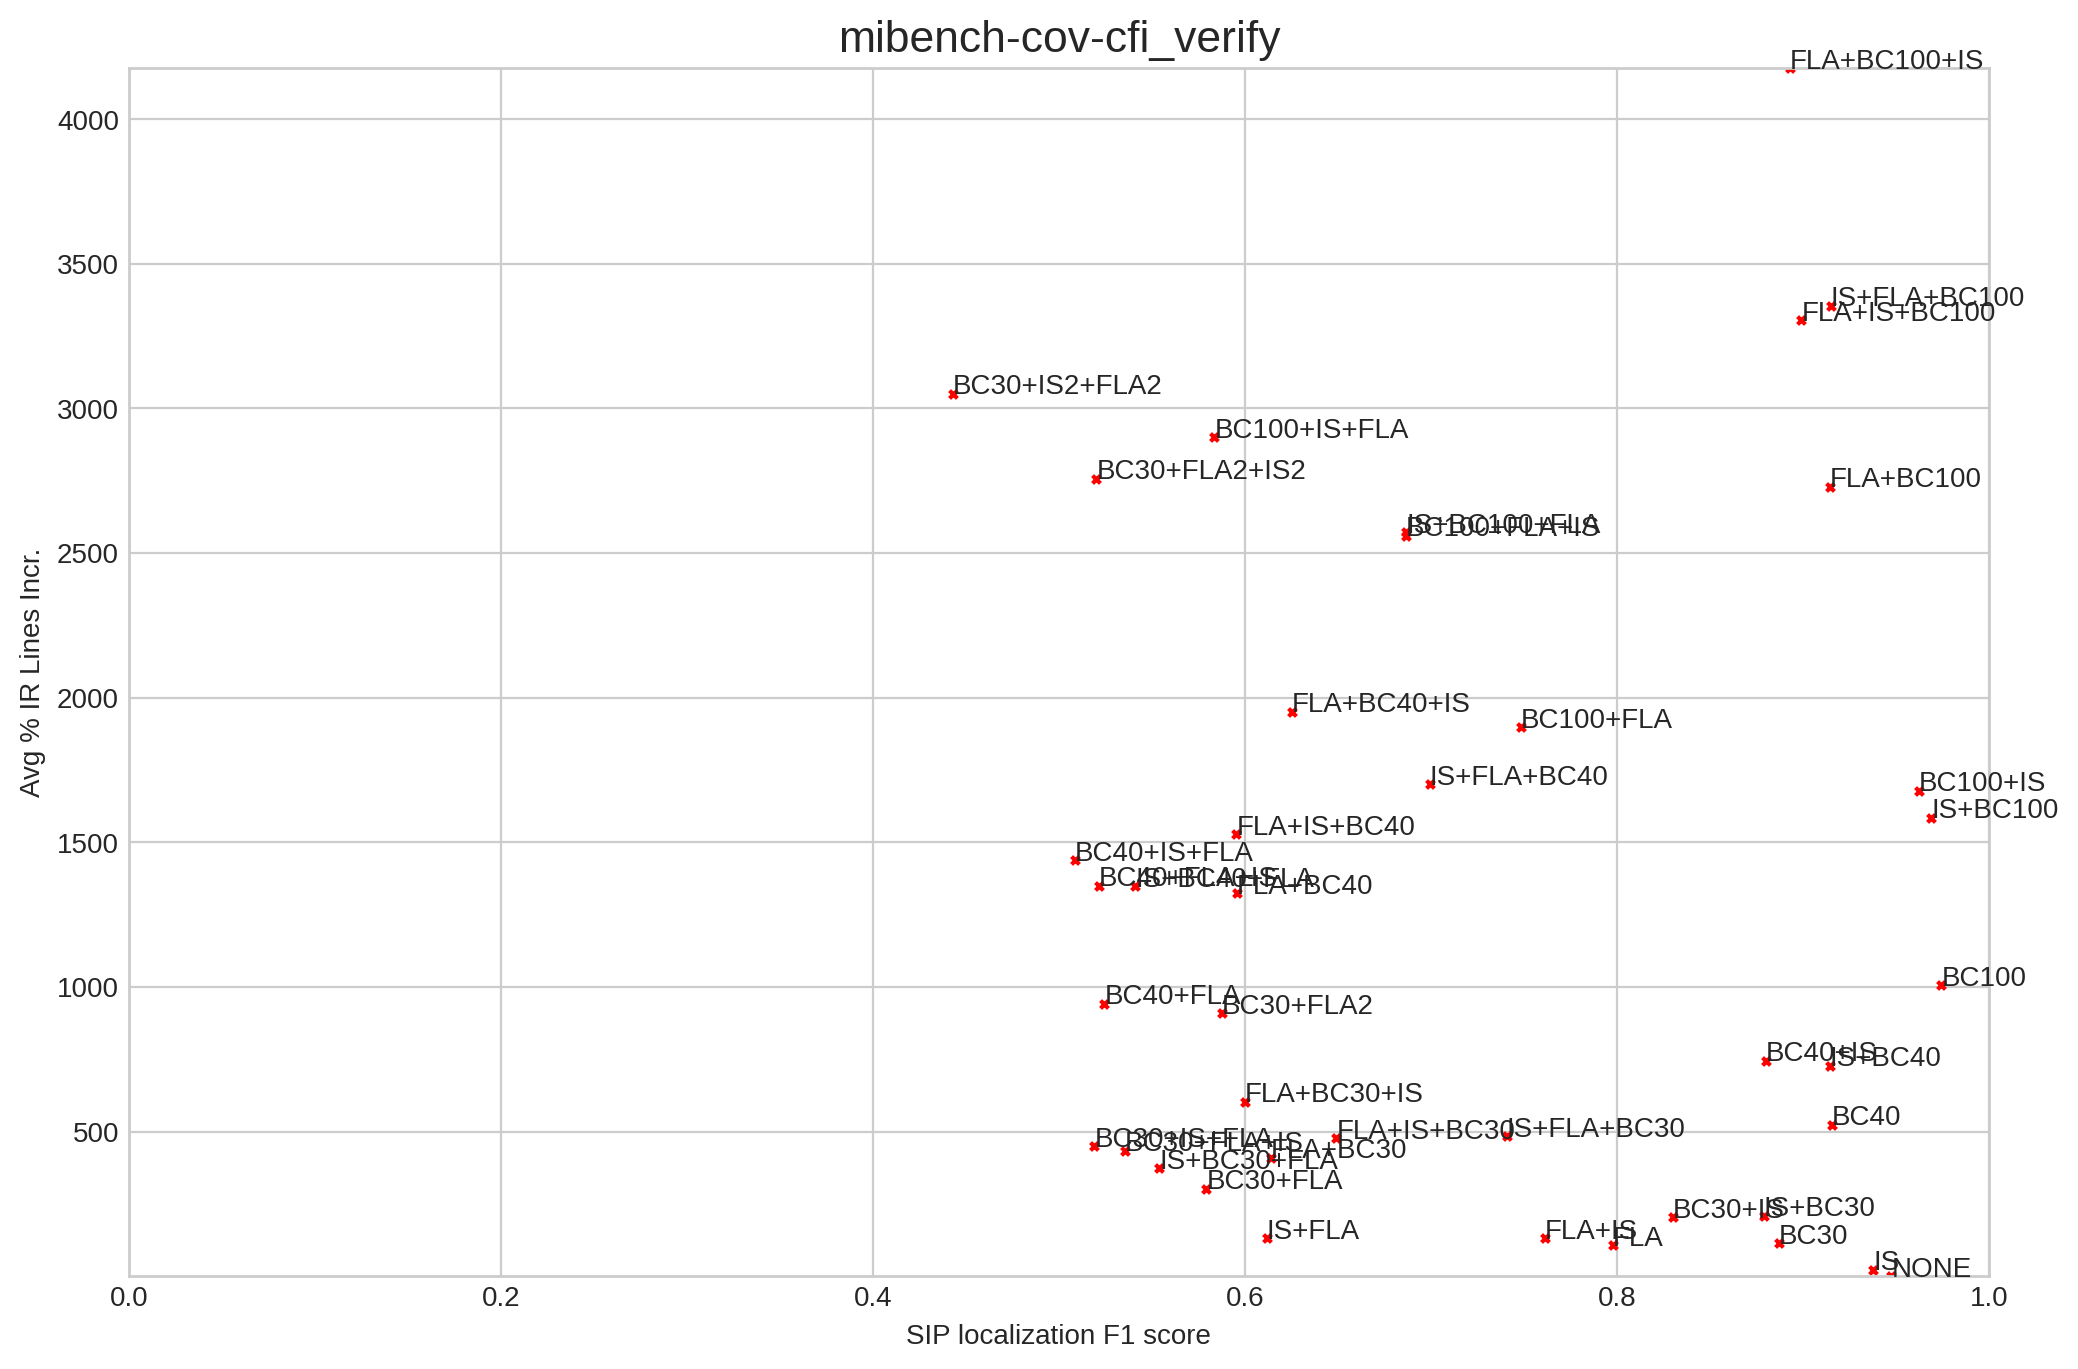

In [232]:
for src_dataset in ['simple-cov', 'mibench-cov']:
    for protection in ['sc_guard', 'oh_verify', 'cfi_verify']:
        plot_results = get_plot_results(df, src_dataset, protection)
        
        best_obfuscation_f1s = {}
        for obfuscation, results in plot_results.items():
            best_obfuscation_f1s[obfuscation] = max(map(median, results.values()))
        
        draw_scatter_plot(best_obfuscation_f1s, obfs_stats, f'{src_dataset}-{protection}')